# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To update sklearn library to the latest version
!pip install -U scikit-learn --user

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

## Loading data

In [ ]:
# Giving Colab access to Drive
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/PG Data Science and Business Analysis/Project 4: INN Hotels/INNHotelsGroup.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copying the data to another variable to avoid any changes to original data
data = df.copy()

## Data Overview

- Observations
- Sanity checks

### View of the first and last 5 rows of the dataset

In [ ]:
# View the first 5 rows
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# View the last 5 rows
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

* The dataset has been loaded properly.
* The columns are as described in the data dictionary and have information attributed to each booking ID displayed in rows.
* Booking_ID column has unique values for each booking made by clients.

### Checking the shape of the dataset

In [ ]:
# Looking at the number of rows and columns
data.shape

(36275, 19)

* The datset has 36275 rows and 19 columns.

### Checking the data types of the columns for the dataset

In [ ]:
# Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There are no missing values in the dataset.
* There are 5 columns of object type (Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status).
* All other variables are numerical.
* Arrival year, month, and data are interpreted as numerical but we know they are date types.
* Repeated guest is interpreted as a numerical column, we know that 0 is not a repeated guest, and 1 is a repeated guest.
* The same happens with required parking space. 0=No, 1=Yes.
* Booking_ID column contains unique values for each booking made by clients.
* Dependent variable (booking_status) is of object type.

### Checking for duplicates and missing values

In [ ]:
# Checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values in the dataset.

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

* There are no duplicate values in the data.

### Dropping the column 'Booking_ID' with all unique values

In [ ]:
# Checking that 'Booking_ID has all unique values
data.Booking_ID.nunique()

36275

* The 'Booking_ID' column contains only unique values, so we can drop it.

In [ ]:
# Dropping the column with all unique values
data = data.drop(['Booking_ID'], axis=1)
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# Checking that the column 'Booking_ID' was properly dropped
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

### Checking the statistical summary of the data

In [ ]:
# Looking at the statistical summary of all rows and columns
data.describe(include='all').T

count unique           top   freq  \
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_

* There are between 0 and 4 adults per booking.
* There is a maximum of 10 children on some bookings, which seems high. The average of children per booking is close to 0.
* On average people spend 0.81 weekend nights at the hotel with a median of 1 and a maximum weekend nights of 7.
* On average bookings are made for 2.2 week nights and a median of 2 week nights. More bookings are made for week nights than weekends, with a maximum o 17.
* There are 4 different meal plans. Meal plan 1 is the most popular with 27835 of the bookings having selected that option.
* There are 7 unique values for room types. Room type 1 is the most selected with 28130 of the total amount being of that type.
* On average, bookings are made 85.23 days in advance, with a lower median of 57 days. Some bookings are made up to 443 days in advance and some on the same day of arrival.
* All arrivals are in the years 2017 and 2018.
* The most common market segment type is online with 23214 of the bookings made online.
* The mean price per room is 103.42 and a median of 99.45. The highest price for a room is 540 and the lowest 0.
* 24390 of the bookings are not canceled.

## Exploratory Data Analysis (EDA)

- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below to help approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, is done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Defining needed functions to carry out the EDA

In [ ]:
# Function to plot stacked bar chart

def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is True)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

In [ ]:
# Function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot stacked bar chart for categories

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate analysis

#### Number of adults

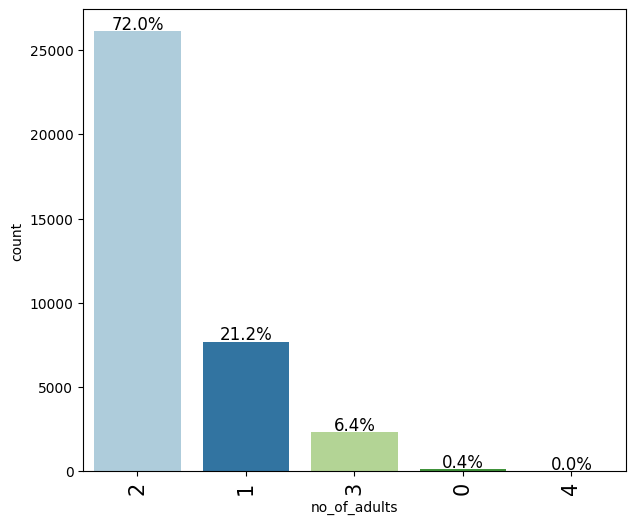

In [ ]:
# Looking at the number of adults in each booking
labeled_barplot(data,'no_of_adults')

* 72% of the bookings are for 2 adults.
* Followed by 21.2% of the bookings for 1 adult.
* 6.4% of the bookings are for 3 adults.
* 0.4% are for 0 adults. We would need further information for this data since most hotels require an adult for the booking.
* The barplot shows 0% of the bookings for 4 adults, however we know from the statistical summary that some bookings were for 4 adults. We will check the value counts for this.

In [ ]:
# Checking the number of adults per booking
data.no_of_adults.value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

* 16 bookings are for 4 adults. Proving that the percentage of bookings is very low for 4 adults and doesn't show on the barplot.
* 139 bookings have 0 adults. We would need more information on the minimum age to make a booking in some of the hotels.

#### Number of children

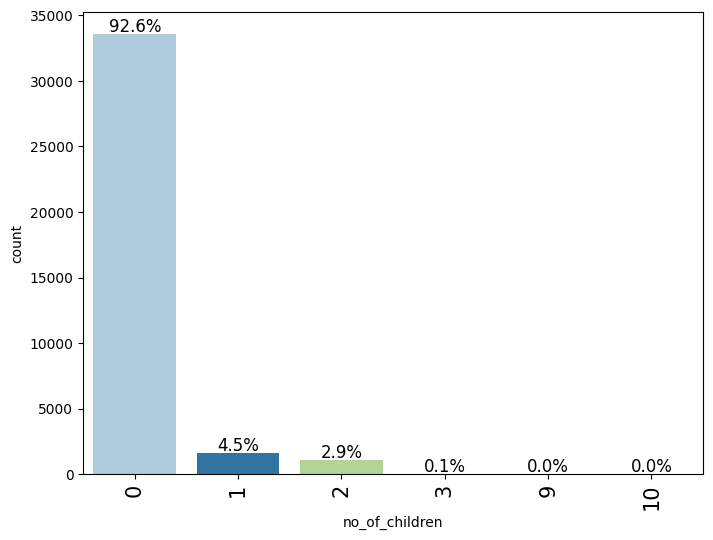

In [ ]:
# Checking the number of children per booking
labeled_barplot(data, 'no_of_children')

* 92.6% of the bookings have no children.
* 4.5% have one child in the reservation, 2.9% have 2 children, and 0.1% have 3 children.
* The barplot jumps from 3 children to 9 and 10 which seem very high numbers compared to the amount of adults per booking observed previously.
* We will check the value counts of these numbers and replace them with 3 children for a more accurate representation of the data.
* We will not drop 9 and 10 children since it is possible that some groups travel with many children, but they could be outliers.

In [ ]:
# Looking at the amount of total children on bookings
data.no_of_children.value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

* Only 1 booking has 10 children and 2 have 9. They could possibly be outliers.
* We will use the IQR method with the upper whisker and replace those values to have a better representation of the data instead of dropping the values so we don't lose relevant observations.

In [ ]:
# Replacing the values 9 and 10 in 'no_of_children' for the max value of 3
data['no_of_children'] = data['no_of_children'].replace([9, 10], 3)

# Checking the counts
data.no_of_children.value_counts()

no_of_children
0    33577
1     1618
2     1058
3       22
Name: count, dtype: int64

#### Number of weekend nights (Saturday or Sunday)

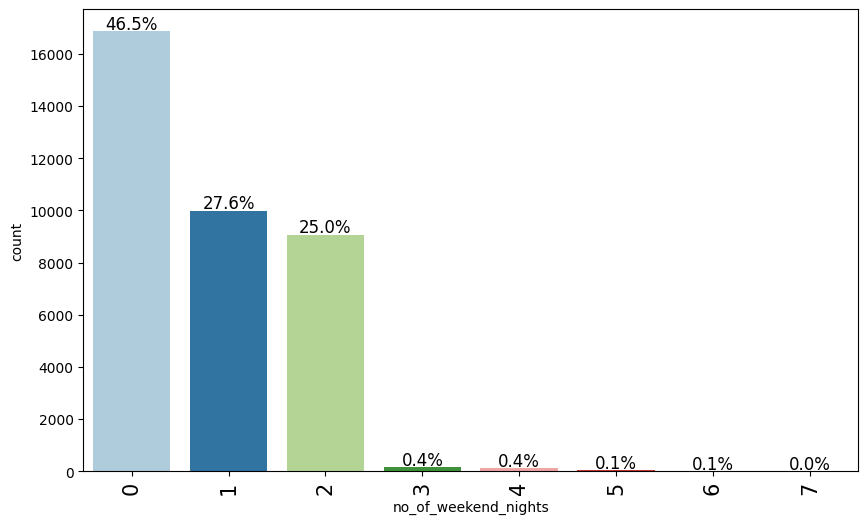

In [ ]:
# Looking at how many weekend nights per booking
labeled_barplot(data, 'no_of_weekend_nights')

* 46.5% of the bookings are not during a weekend night.
* 27.6% are for one weekend night and 25% for 2 weekend nights.
* Less than 0.5% of the bookings are for 3, 4, 5, 6, or 7 weekend nights.

#### Number of week nights (Monday to Friday)

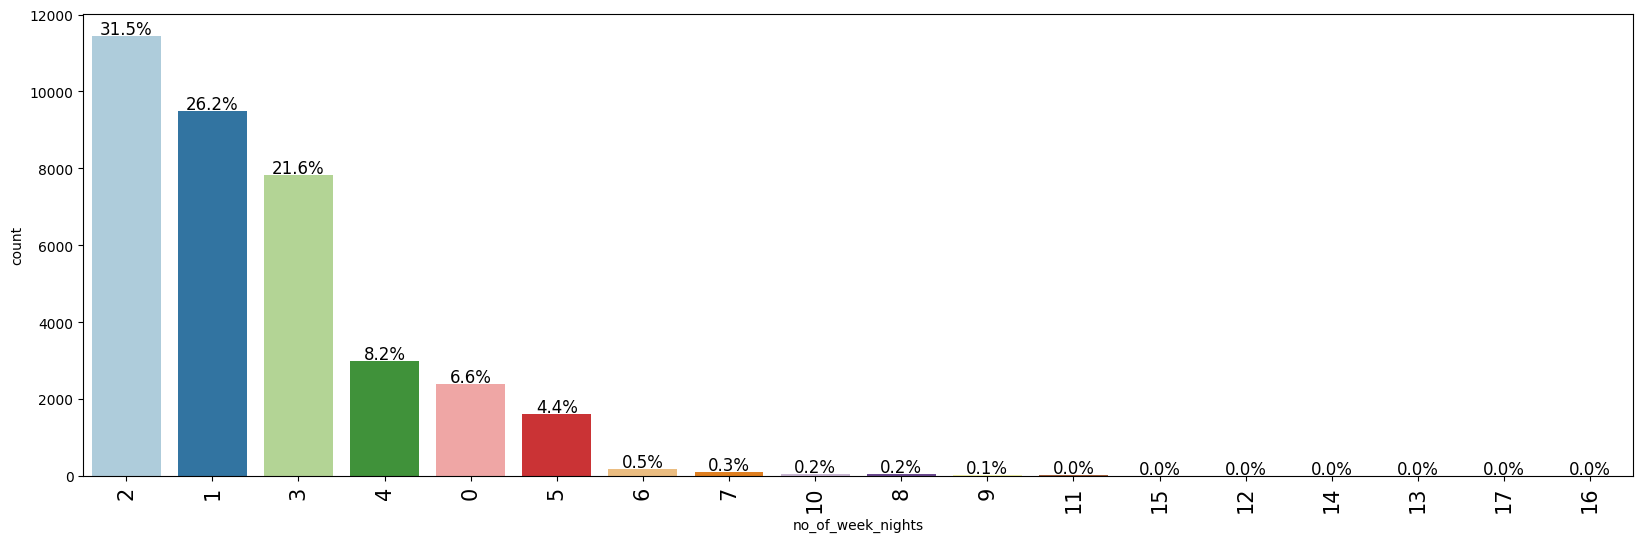

In [ ]:
# Looking at how many week nights per booking
labeled_barplot(data, 'no_of_week_nights')

* 31.5% of the bookings are for 2 week nights.
* Followed by 26.6% for 1 week night and 21.6% for 3.
* 8.2% of the reservations are for 4 week nights.
* 6.6% are not during week nights and 4.4% are for a total of 5 week nights.
* 0.5% or less are between 6 and 17 week nights.

#### Type of meal plan

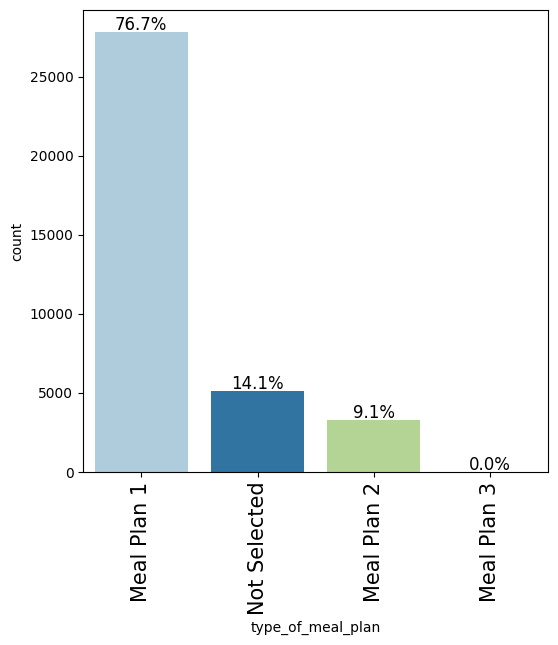

In [ ]:
# Looking at the types of meal plans chosen
labeled_barplot(data, 'type_of_meal_plan')

* Most bookings (76.7%) choose meal plan type 1 that includes breakfast.
* 14.1% of bookings don't select a meal plan.
* 9.1% choose meal plan 2 that includes half board (breakfast and one meal).
* Very few reservations choose meal plan 3 that includes all meals.

#### Required car parking space

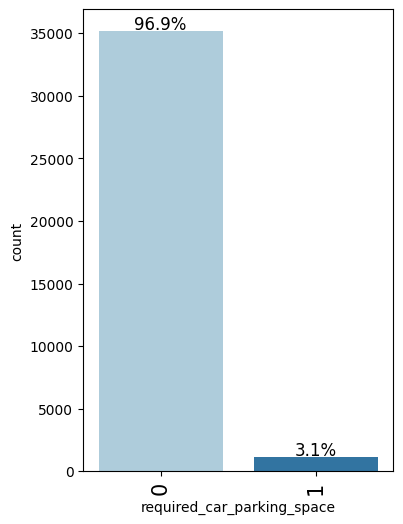

In [ ]:
# Checking how many guests require parking
labeled_barplot(data, 'required_car_parking_space')

* 96.9% of the bookings don't need parking. This could be due to high cost of parking in the hotel, the location of the hotel, or a cheaper nearby parking lot.
* Only 3.1% of he reservations need at least one parking space.

#### Room type reserved

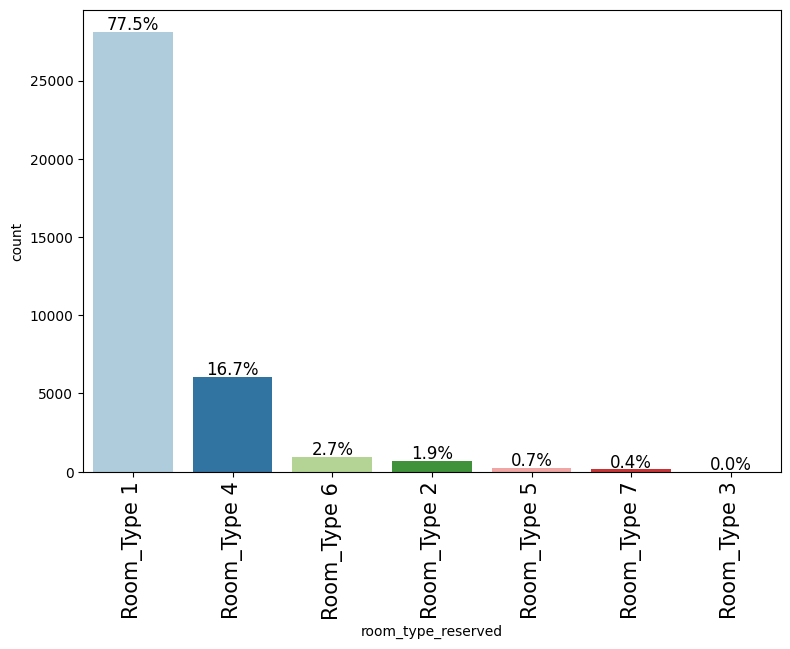

In [ ]:
# Looking at the room types chosen
labeled_barplot(data, 'room_type_reserved')

* Most rooms reserved are of type one (77.5%).
* Followed by type 4 with 16.7%.
* Very few rooms of type 5, 7, and 3 are reserved.

#### Lead time (Days between the date of booking and arrival)

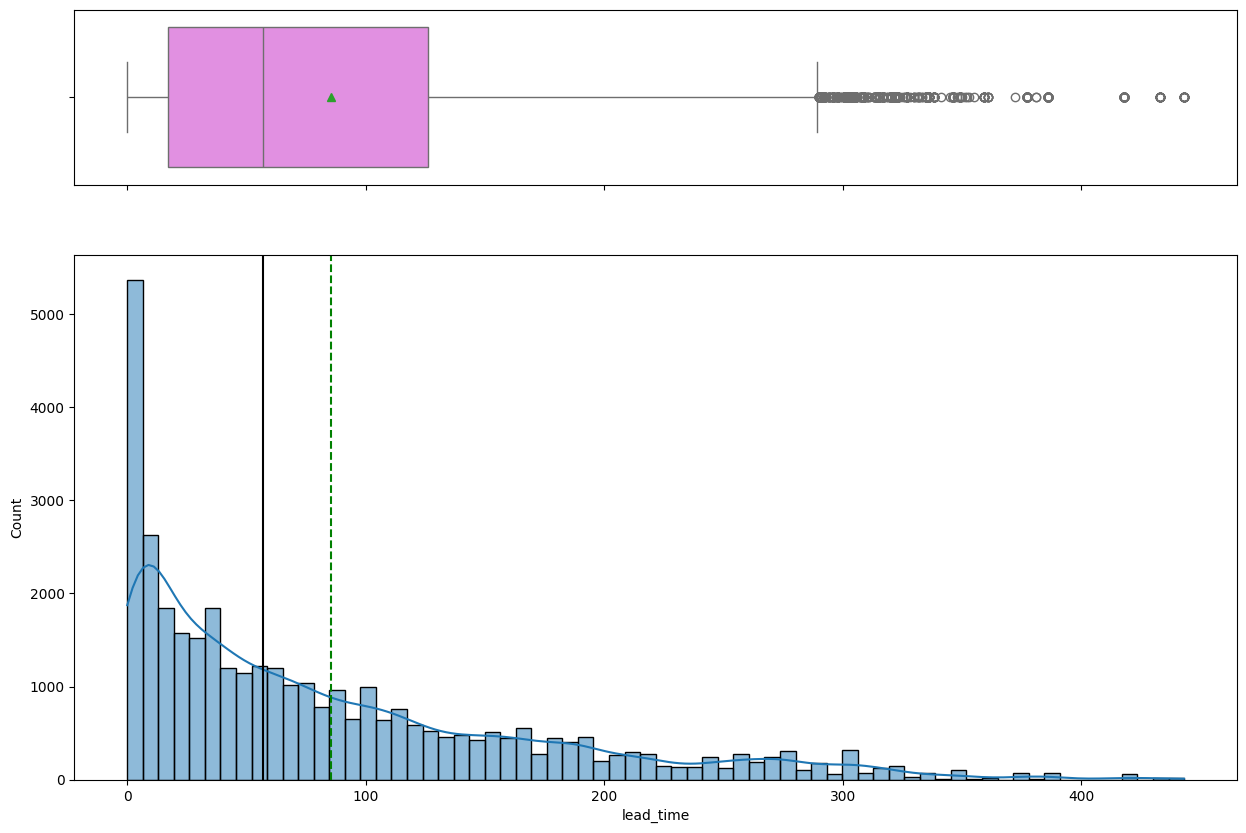

In [ ]:
# Looking at how many days in advance guests make a reservation
histogram_boxplot(data, 'lead_time')

* The data is heavily right skewed.
* On average bookings are made around 70 to 80 days in advance.
* The mode of days in advance for a booking is up to 8 days.
* Bookings made over 300 days in advance are considered outliers.
* 50% of the bookings are made between 14 and 120 days in advance.

#### Arrival year (Year of arrival date)

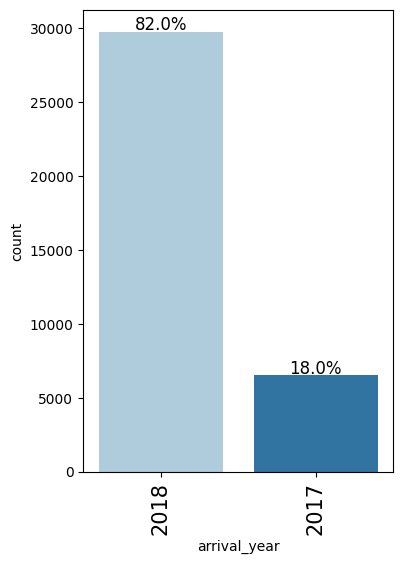

In [ ]:
# Looking at the arrivals per year
labeled_barplot(data,'arrival_year')

* 82% of the bookings in the dataset are for arrivals in 2018.
* The rest are for arrivals in 2017.

#### Arrival month (Month of the year)

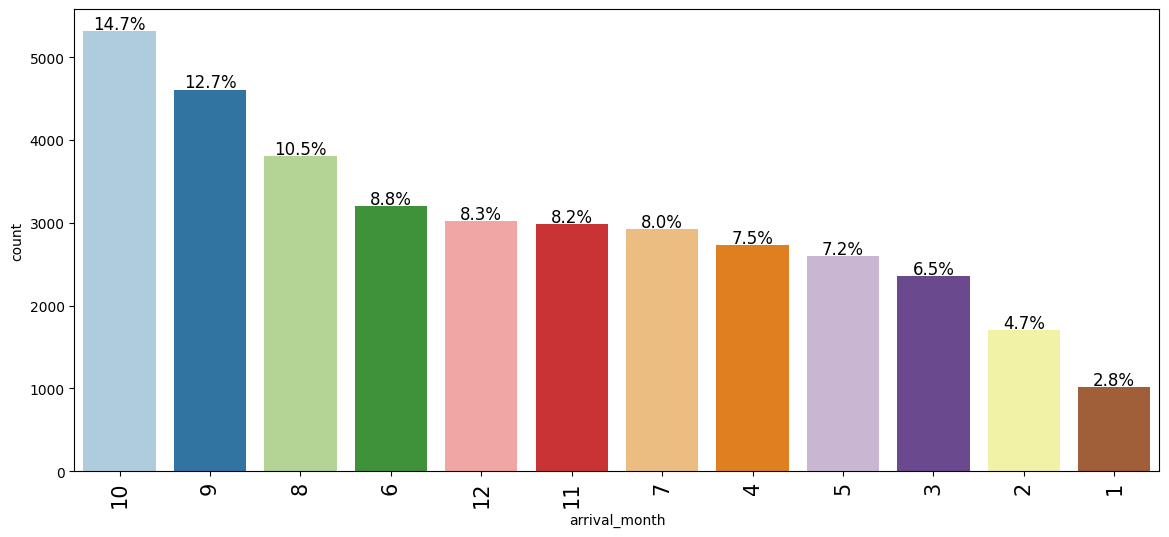

In [ ]:
# Checking the arrivals per month
labeled_barplot(data, 'arrival_month')

* There are 12 unique values in the dataset for arrival month. Which corresponds with the 12 months in the year.
* 14.7% of the arrivals are in October. Making it the most popular and busiest month.
* Followed by September with 12.7% and August with 10.5%.
* June, July, November, and December have between 8 and 9% of the arrivals.
* March, April, and May have between 6.5 and 7% of the arrivals.
* January and February are the least popular months.

#### Arrival date (Day of the month)

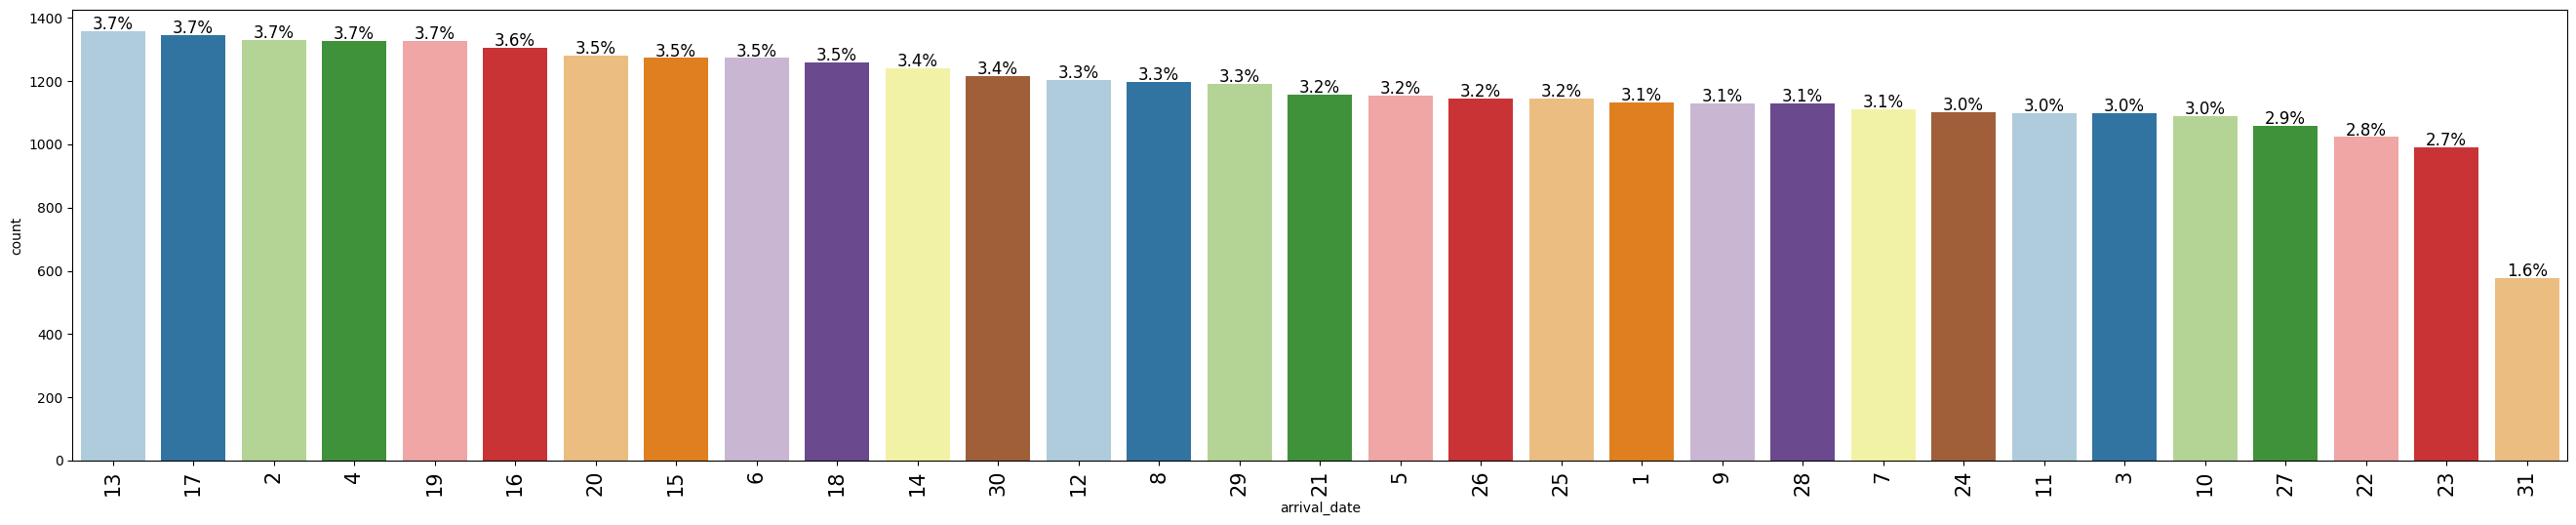

In [ ]:
# Looking at what days of the month guests arrive
labeled_barplot(data, 'arrival_date')

* There is no clear evidence for when people prefer to arrive.
* The 31st has a lower percentage of arrivals due to not every month having 31 days.

#### Market segment type

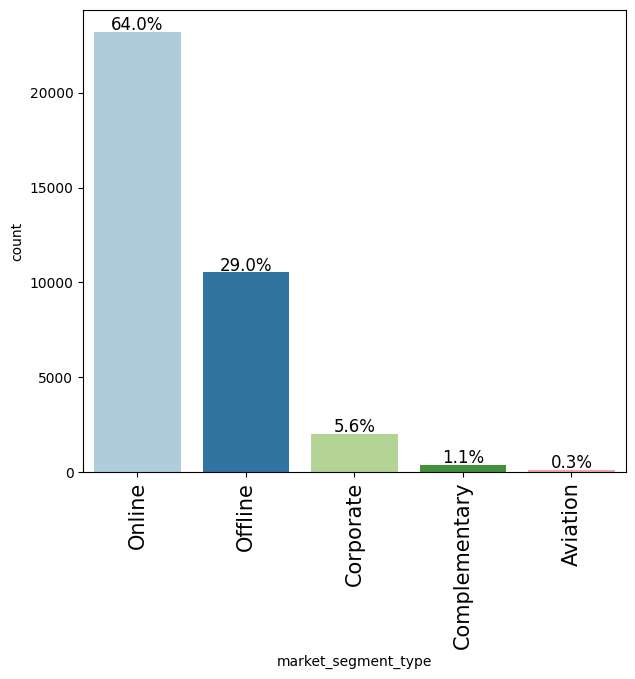

In [ ]:
# Checking market segments
labeled_barplot(data, 'market_segment_type')

* Most of bookings (64%) are online.
* Followed by offline with around 10000 or 29% of the bookings.
* Corporate comprises 5.6% of the bookings.
* Complementary and Aviation have the lowest percentages with 1.1 and 0.3 respectively.

#### Repeated guest

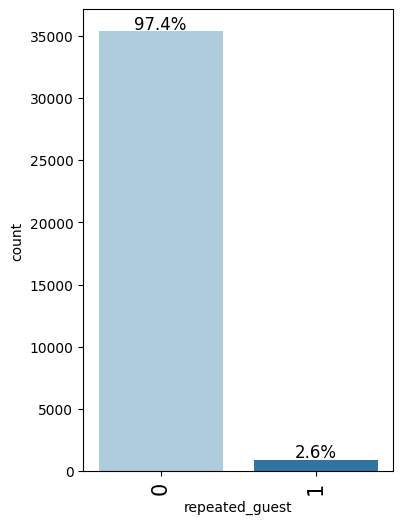

In [ ]:
# To see how many guests come back
labeled_barplot(data, 'repeated_guest')

* 97.4% or around 35000 of the bookings are not repeating guests.

#### Number of previous cancellations

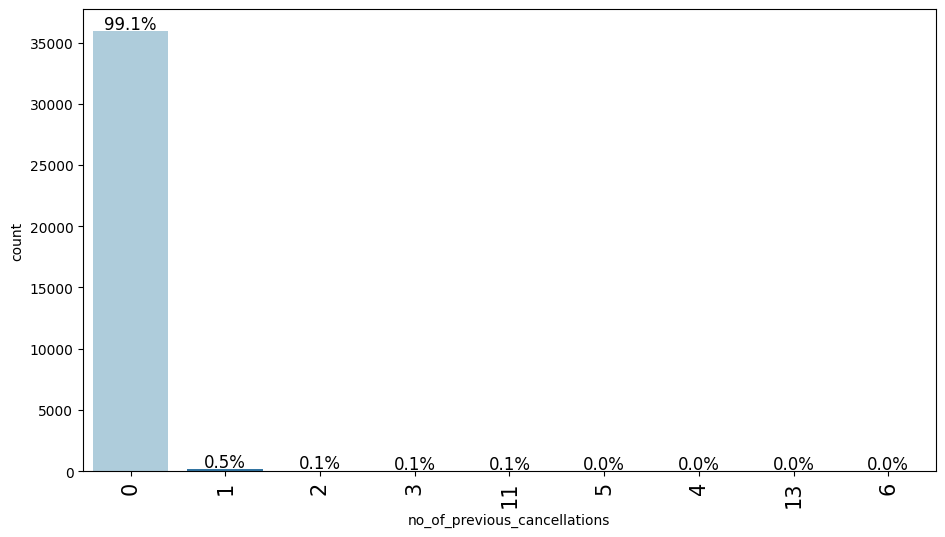

In [ ]:
# Looking at how many time guests cancel previous bookings
labeled_barplot(data, 'no_of_previous_cancellations')

* Majority of the customers (99.1%) don't have any previously canceled bookings.
* Few customers canceled 11 and 13 times.

#### Numer of previous bookings not canceled

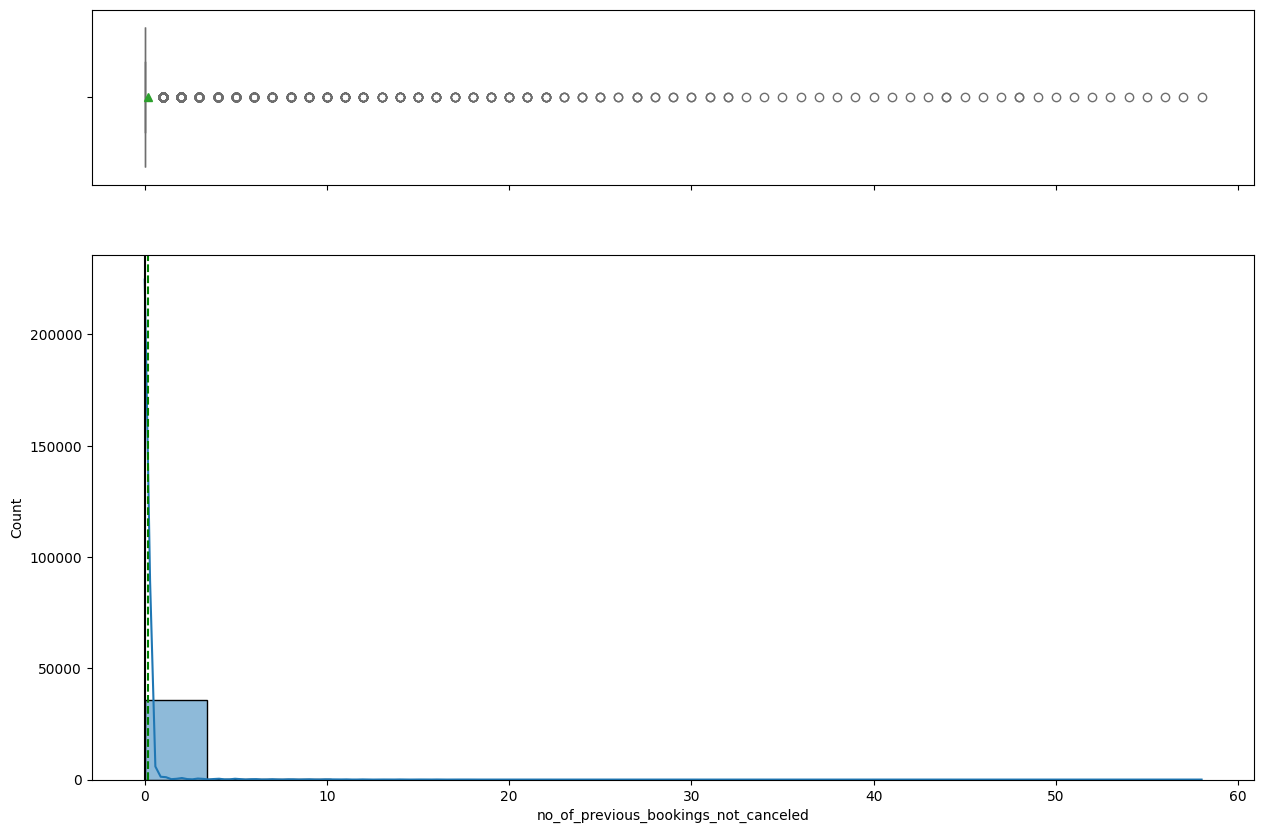

In [ ]:
# Looking if guests don't cancel any reservations
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

* Most customers don't have any previous bookings not canceled.
* Few customers have up to 58 previous bookings not canceled. These could be the repeated customers (2.6%) observed previously.

#### Average price per room (in euros and per day of the reservation)

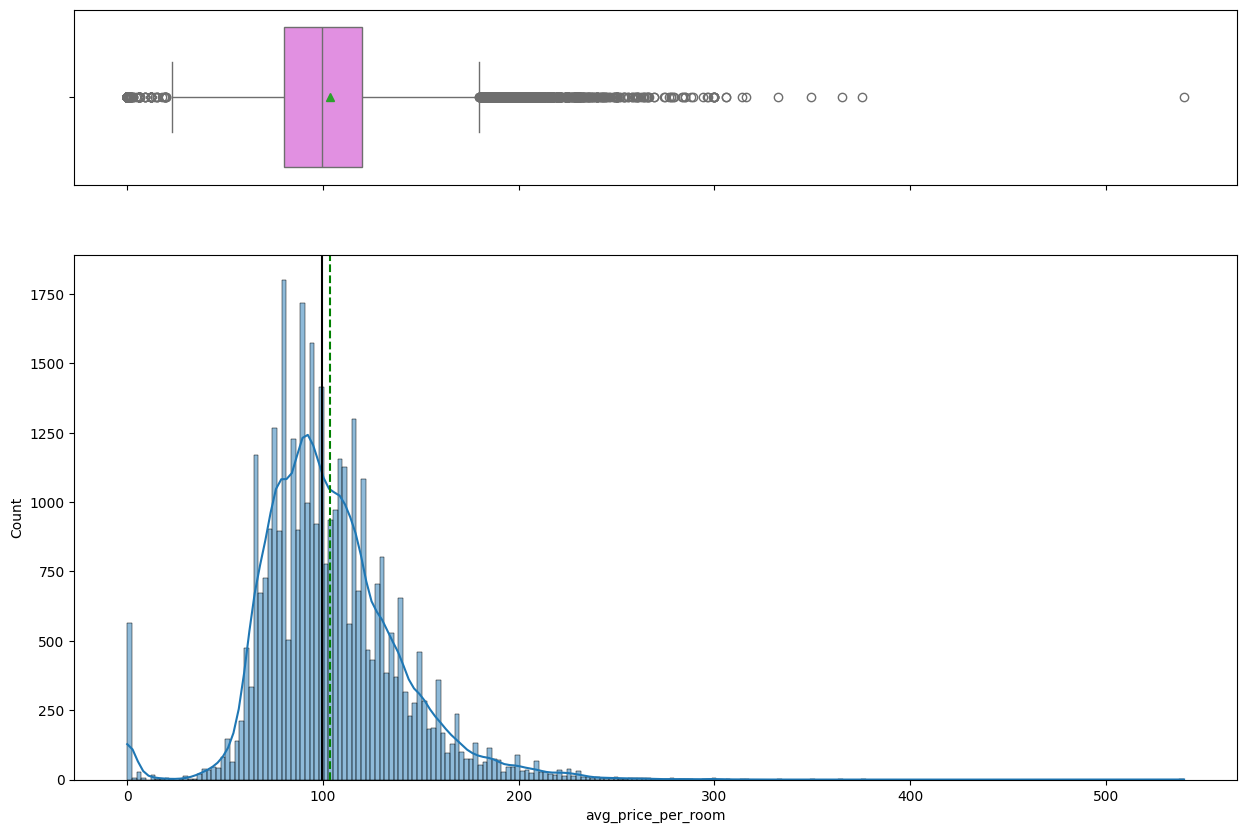

In [ ]:
# Checking the average price per room
histogram_boxplot(data, 'avg_price_per_room')

* The data is right skewed with a few outliers on both ends.
* Mean and median are close to each other at around 100 euros.
* 50% of the rooms have an average price of around 80 to 120 euros.
* One room cost more than 500 euros on average and is very far from all the other prices. This could be an error but it is possible to be a true value for a higher end room.
* Some rooms have a price of 0 euros and could be inaccurate values. However, over 500 bookings have an average price of 0 euros, this could be due to complementary rooms or repeated guests that use a point system.

Let's take a look at those values isolated.

In [ ]:
# Looking at bookings with and average price of 0
data.loc[data['avg_price_per_room']==0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

* These could be true values and we will leave them as is.

In [ ]:
# Looking at bookings with higher average price
data.loc[data['avg_price_per_room']>400]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0           540.00000   

       no_of_special_requests booking_status  
33114                       0       Canceled

* We will treat this value as it seems a true outlier and it is a canceled booking.
* We are going to replace it for the upper whisker value using the IQR method.

In [ ]:
# 25th quantile
Q1 = data['avg_price_per_room'].quantile(0.25)

# 75th quantile
Q3 = data['avg_price_per_room'].quantile(0.75)

# To calculate interquantile range
IQR = Q3 - Q1

# Looking at the upper whisker value to replace the outlier
print(Q3 + 1.5 * IQR)

179.55


In [ ]:
# Replacing the outlier value for the upper whisker
data.loc[data['avg_price_per_room']>400, 'avg_price_per_room'] = 179.55

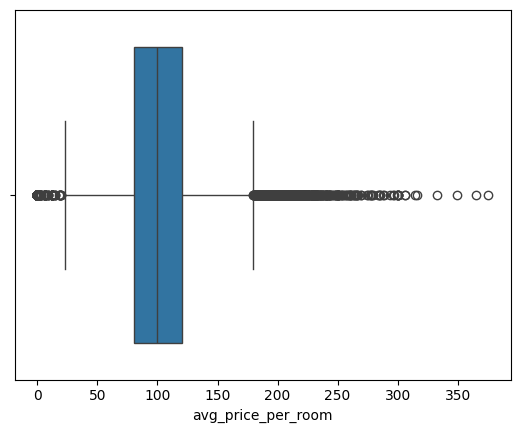

In [ ]:
# Visual of average price to check outlier treatment
sns.boxplot(data=data, x='avg_price_per_room');

#### Number of special requests

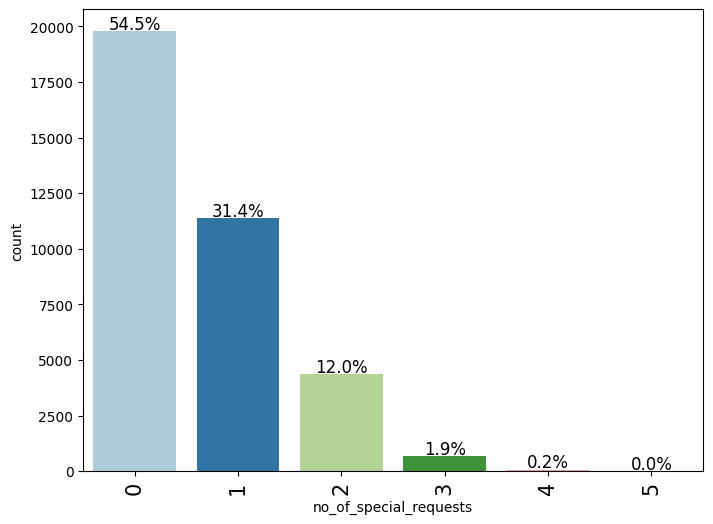

In [ ]:
# Checking how many special requests guests make
labeled_barplot(data, 'no_of_special_requests')

* More than half of the bookings (54.5%) don't have special request.
* 31.4% have 1 special request.
* Few bookings have up to 3 to 5 special requests (total of 2.1%).

#### Booking status

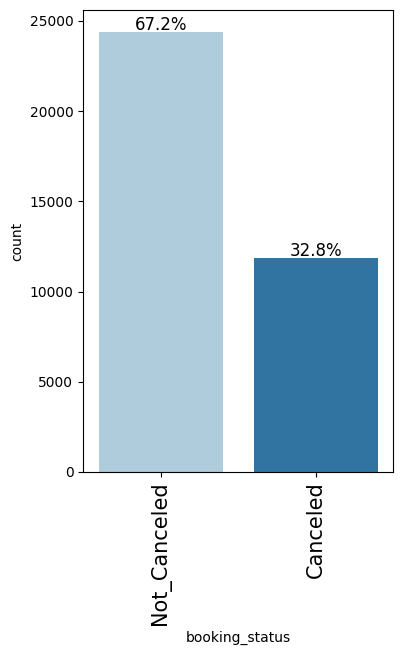

In [ ]:
# Checking the percentage of canceled bookings
labeled_barplot(data, 'booking_status')

* About two thirds of the bookings (67.2%) were not canceled.

### Bivariate analysis

#### Correlation check

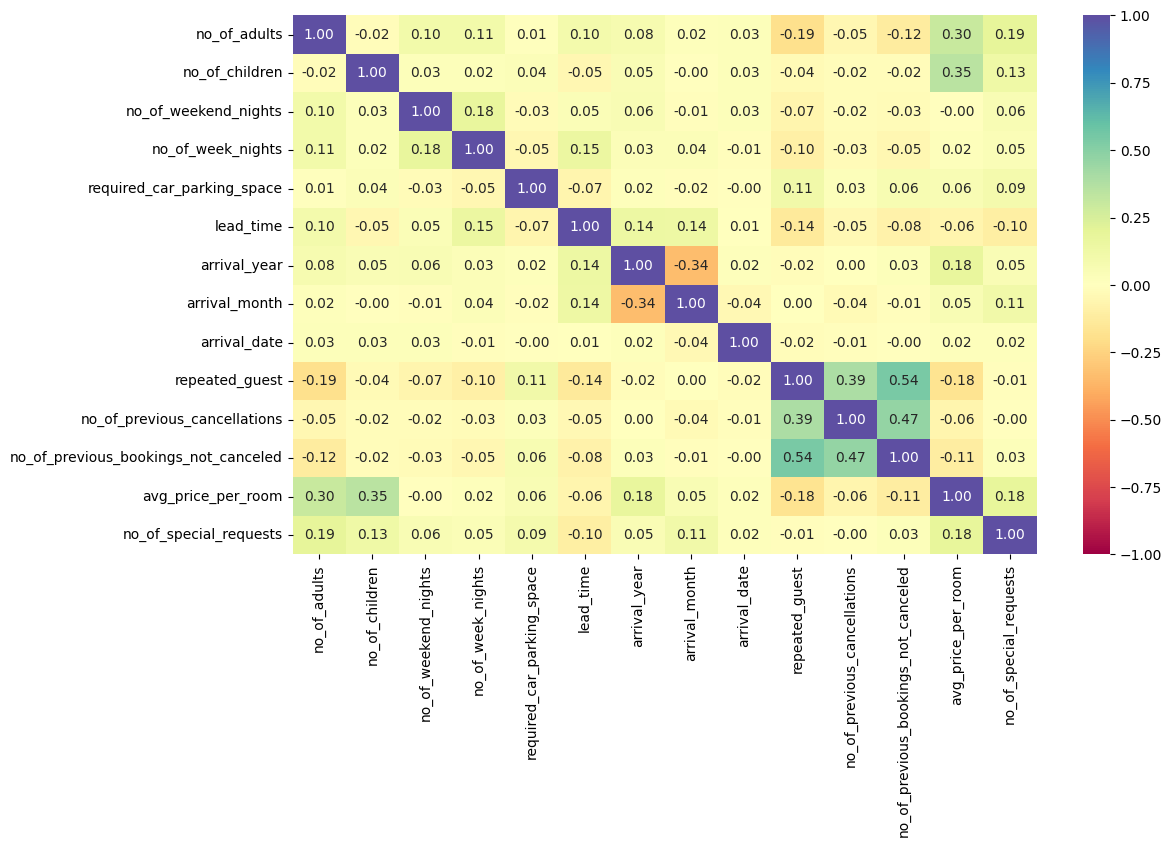

In [ ]:
# Creating a new variable with numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

* There is a positive correlation between repeated guest, number of previous cancellations, and number of previous bookings not canceled.
* Average price per room increases with the number of adults, number of children, or number of special requests.
* The price per room has a slight negative correlation with repeated guest, which makes sense since repeating guest may use points or receive discounts.


#### Average price per room and market segment

Hotel rates are dynamic and change according to demand and customer demographics. Let's look at the differences in room prices in different market segments.

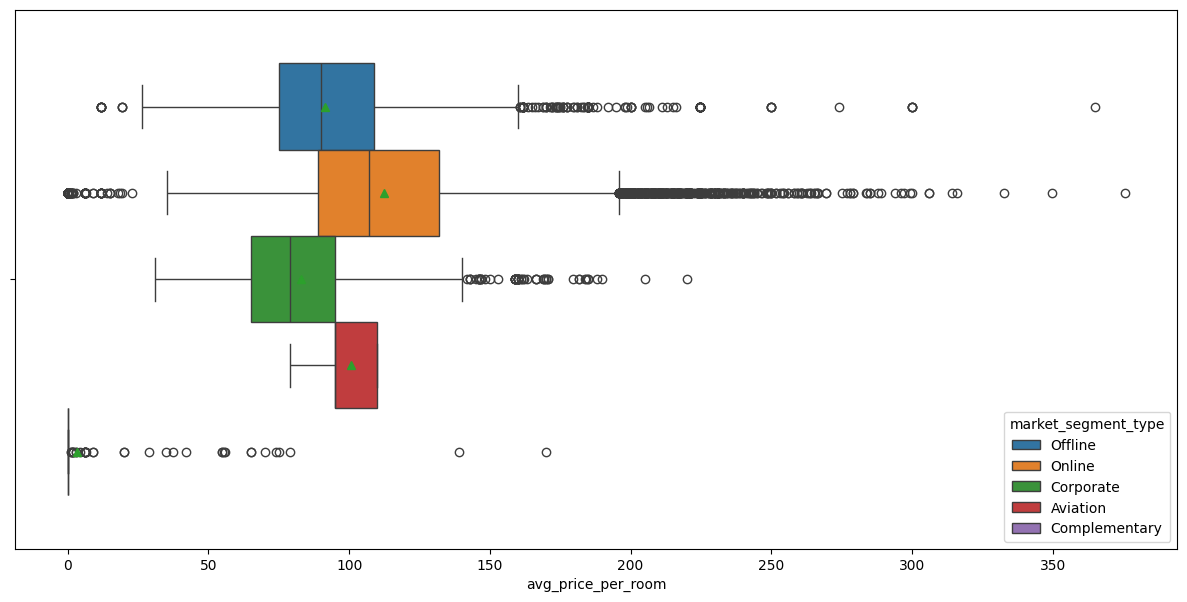

In [ ]:
# Relation between price and market
plt.figure(figsize=(15,7))
sns.boxplot(data=data, x='avg_price_per_room', hue='market_segment_type', showmeans=True);

* Overall online segment has the biggest variance in price but also the higher prices.
* On average online has the highest average prices.
* Complementary has the lowest prices overall with many outliers on the upper side.
* Aviation has no outliers and the smallest variance. All prices are between 75 and 120.
* Corporate and offline have similar average prices with corporate having a smaller variance and slightly lower mean and median prices.

Let's look at the relationship between market segments and repeated guests.

#### Market segment and repeated guest

repeated_guest           0    1    All
market_segment_type                   
All                  35345  930  36275
Corporate             1415  602   2017
Complementary          265  126    391
Online               23118   96  23214
Offline              10438   90  10528
Aviation               109   16    125
------------------------------------------------------------------------------------------------------------------------


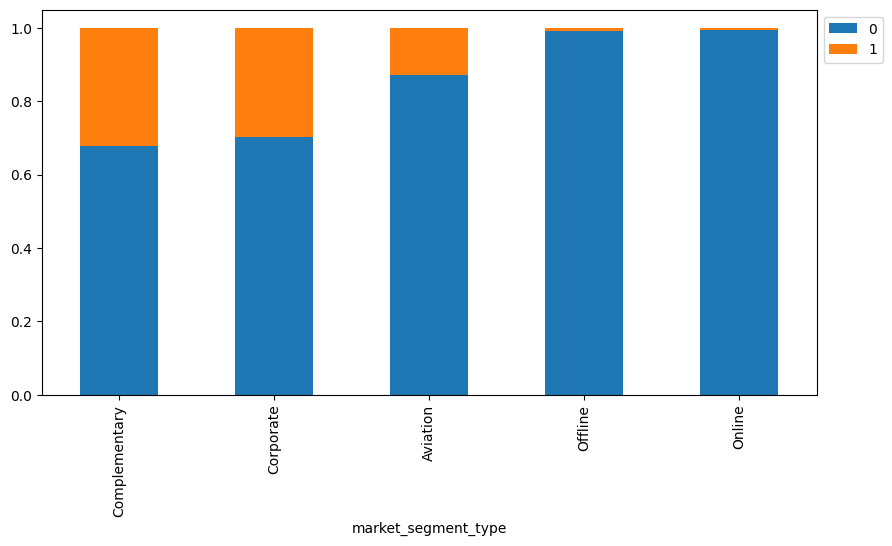

In [ ]:
# Visual between market and repeating guests
stacked_barplot(data, 'market_segment_type', 'repeated_guest')

* Most of the repeating guests are from the complementary segment or corporate.
* Aviation also has some repeated guests. We would need to further analyze the location of the hotels.

Let's look at the relation between market segments and booking status to see how it affects repeated guests and room prices.

#### Market segment type and booking status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


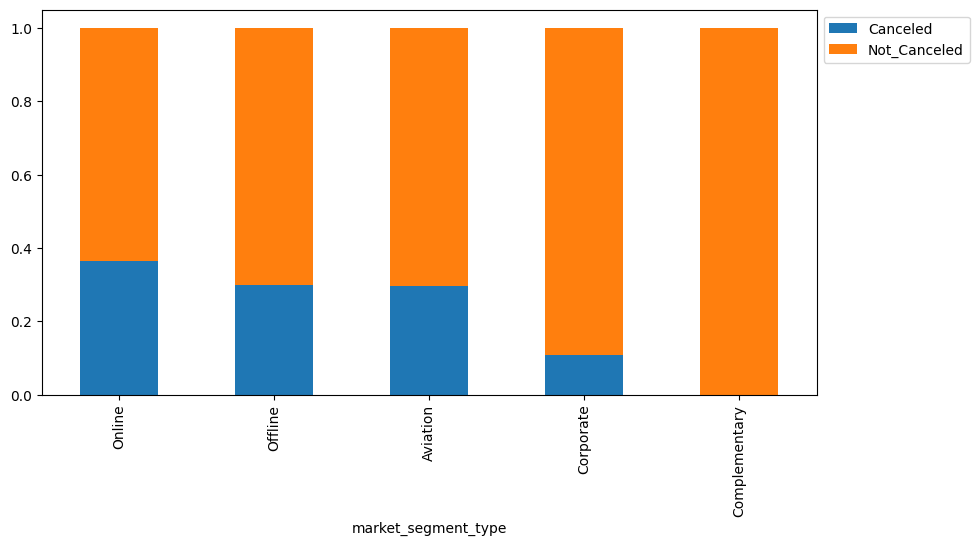

In [ ]:
# Visual between market and cancellations
stacked_barplot(data, 'market_segment_type', 'booking_status')

* All bookings in the complementary category are not canceled. We also know that these tend to be the repeated guests.
* Most of the corporate bookings are not canceled, with a small percentage of canceled bookings. These are also some of the most repeating guests.

Let's check if the price per room also has an impact on booking status.

#### Booking status and average price per room

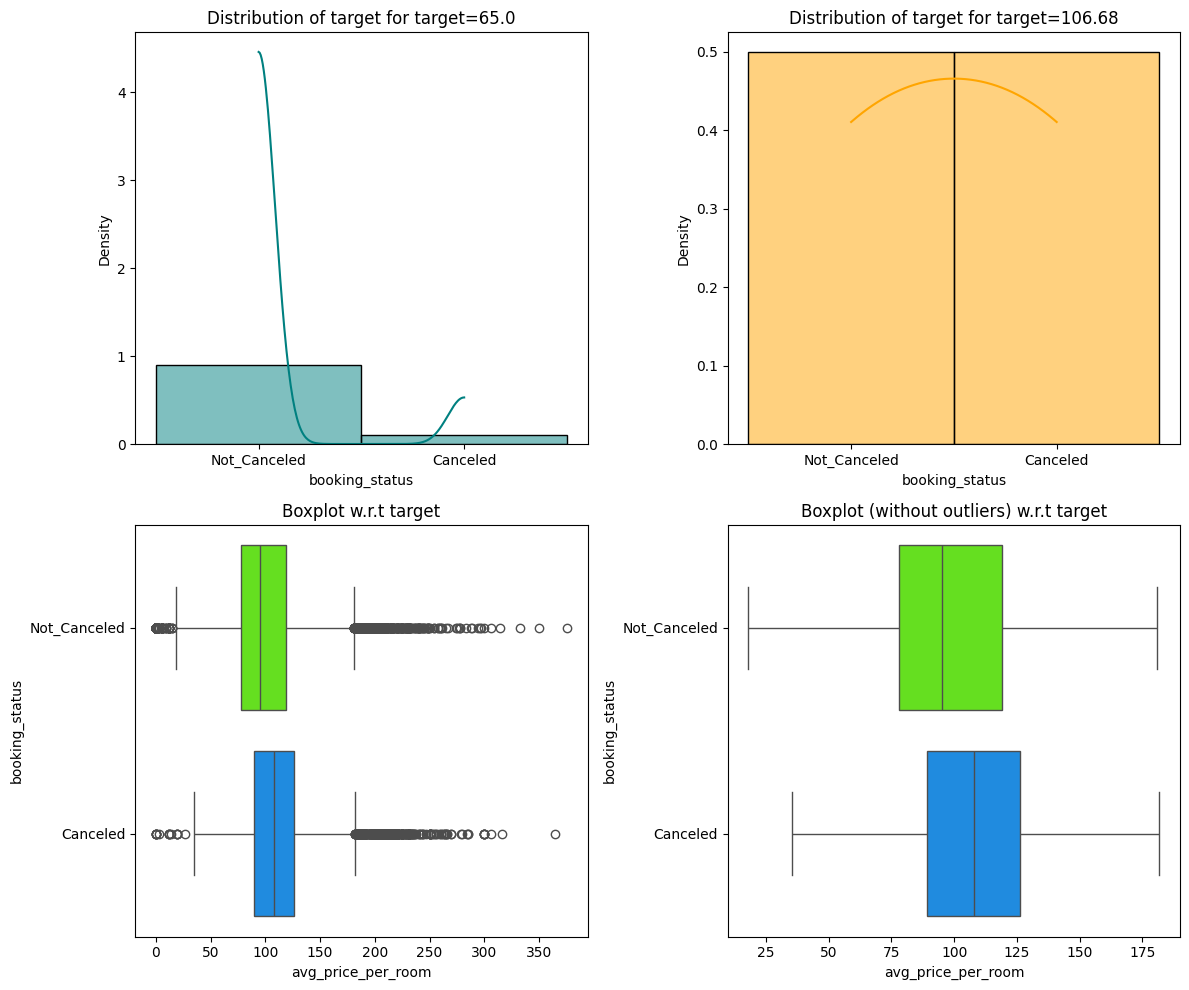

In [ ]:
# Visual between price and cancellations
distribution_plot_wrt_target(data, 'booking_status', 'avg_price_per_room')

* There are outliers in both boxplots and both ends.
* Canceled bookings have slightly higher average prices than not canceled.
* This makes sense because we saw that online and offline guests have a higher average price and are more likely to cancel.

Let's see if other aspects have an impact on cacellations.

#### Booking status and amount of special requests

Many guests have special requirements when booking a hotel room. Let's see if these requirements affect booking cancellation.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


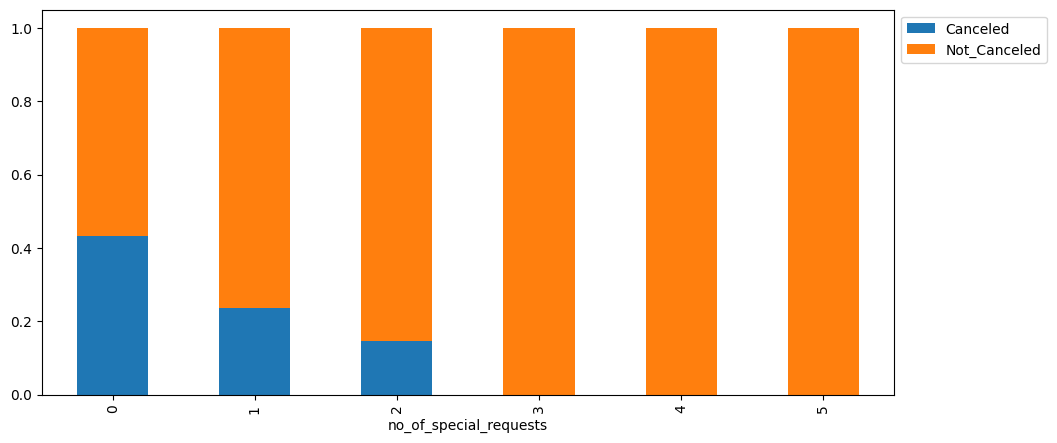

In [ ]:
# Visual between amount of special requests and cancellations
stacked_barplot(data, 'no_of_special_requests', 'booking_status')

* The higher the amount of requests the less likely they are to cancel. This could be due to previous research done by the guest or the requirements needed.
* This could show that the less amount of requirements, the easier it is for a guest to cancel and find another hotel.

Let's see if the amount of cancellations is related to lead time.

#### Booking status and lead time

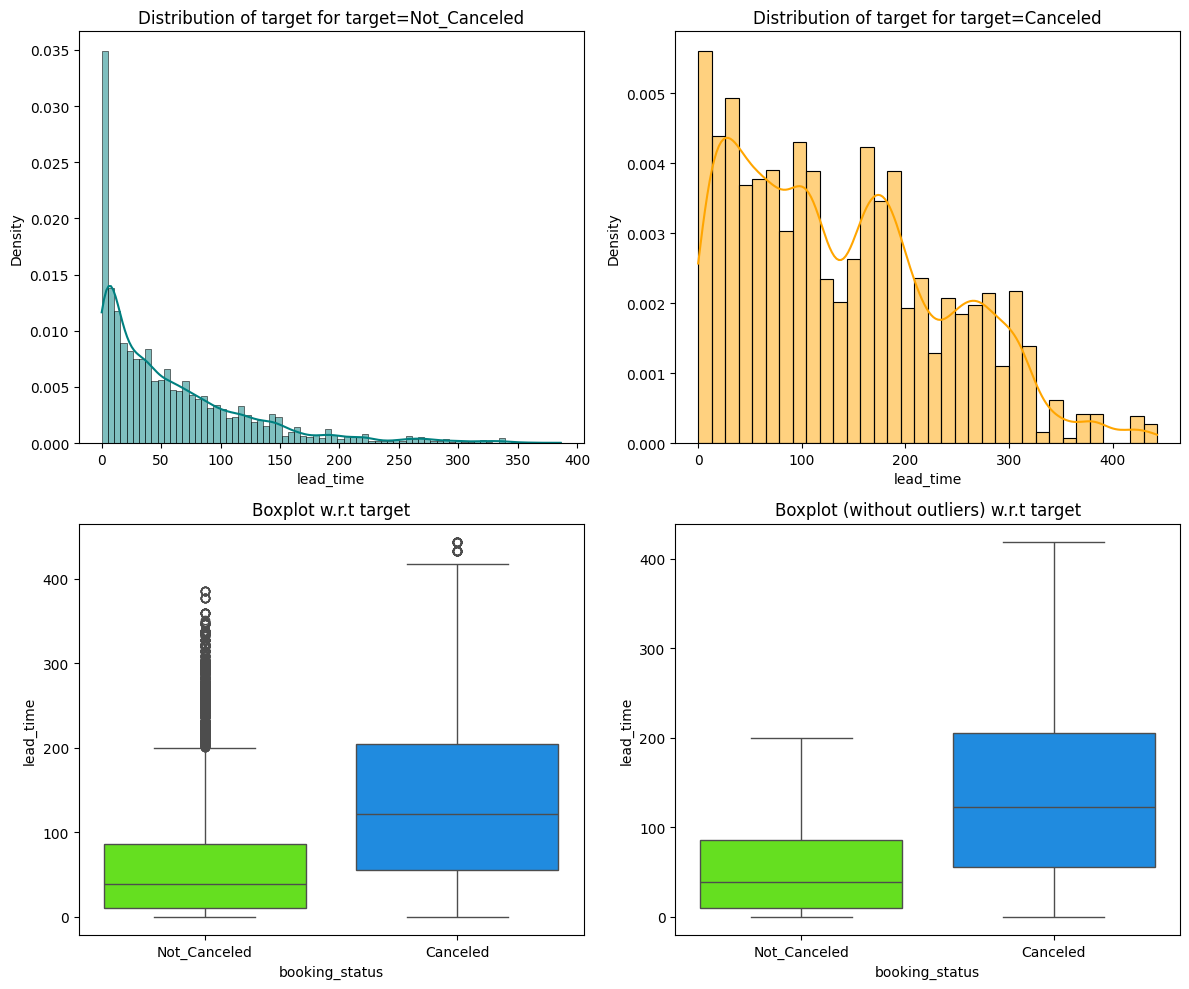

In [ ]:
# Relation between lead time and cancellations
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

* Bookings are clearly more likely to be canceled if there is a higher lead time.

Lastly, let's see if cancellations are more likely to happen based on repeating guests. Repeating guests are the guests who stay in the hotel often and are important to brand equity.

#### Booking status and repeating guests

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


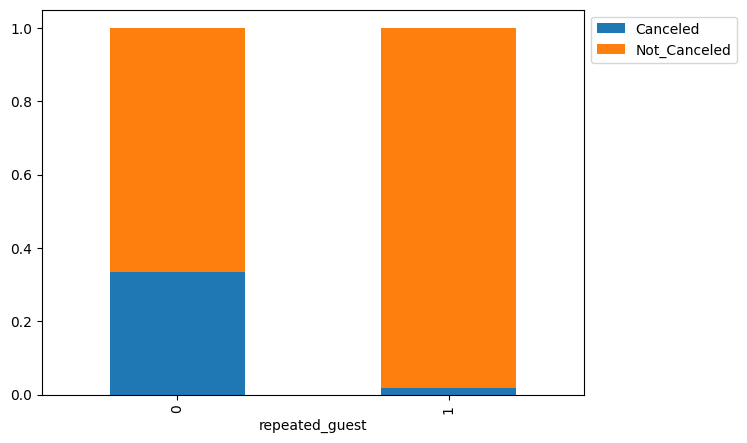

In [ ]:
# Relationship between repeating guests and cancellations
stacked_barplot(data, 'repeated_guest', 'booking_status')

* Almost all repeating guests don't cancel their booking (914 out of 930 don't cancel).
* Not repeating guests are more likely to cancel. However, the percentage of not canceled is higher than canceled.

Let's take a look to see if repeating guests have any previously canceled bookings.

#### Repeated guest and number of previous cancellations

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
repeated_guest                                                            
1                               592  198  46  43  10  11  1  25   4    930
All                           35937  198  46  43  10  11  1  25   4  36275
0                             35345    0   0   0   0   0  0   0   0  35345
------------------------------------------------------------------------------------------------------------------------


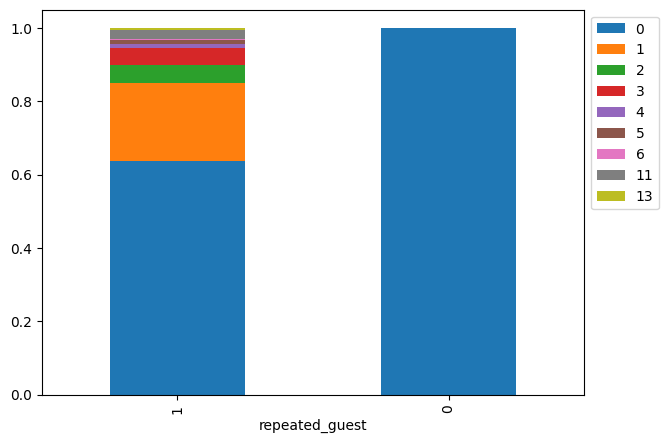

In [ ]:
# Relation between repeating guest and previous cancellations
stacked_barplot(data, 'repeated_guest', 'no_of_previous_cancellations')

* Non repeating guests don't have any previous cancellations.
* Almost 40% of repeating guests have at least one previous cancellation.

It is also possible that cancellations are more likely to occur in specific months. We will take a look.

#### Booking status and month of the year

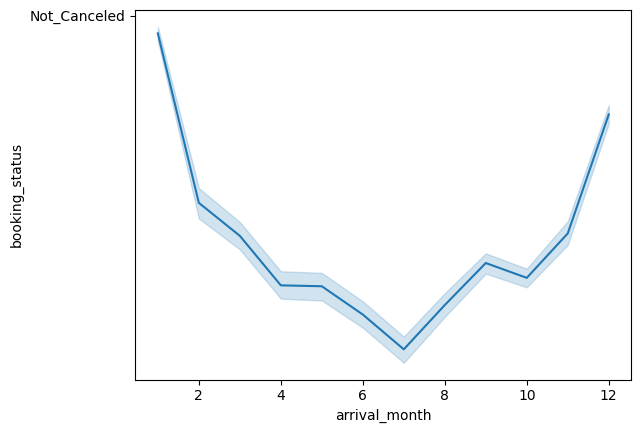

In [ ]:
# Visual on month of the year and cancellations
sns.lineplot(data=data, x='arrival_month', y='booking_status');

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


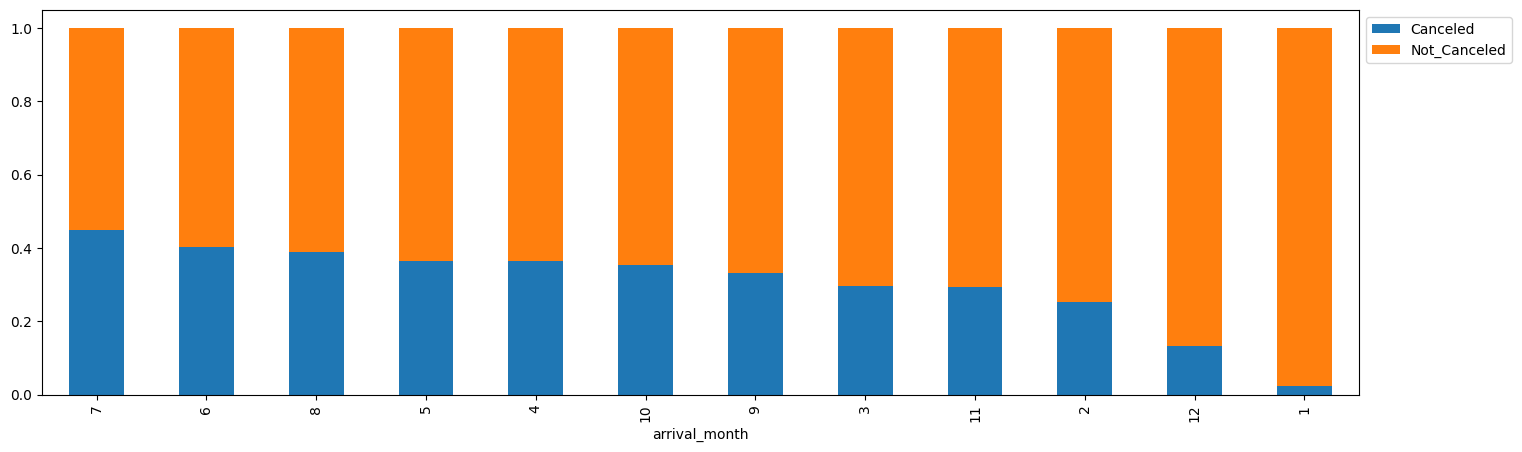

In [ ]:
# barplot on month of the year and cancellations
stacked_barplot(data, 'arrival_month', 'booking_status')

* Bookings are less likely to be canceled during winter.
* These are also the months with less arrivals.

Let's see if the price per room also varies depending on the year and month.

#### Year and price of the room

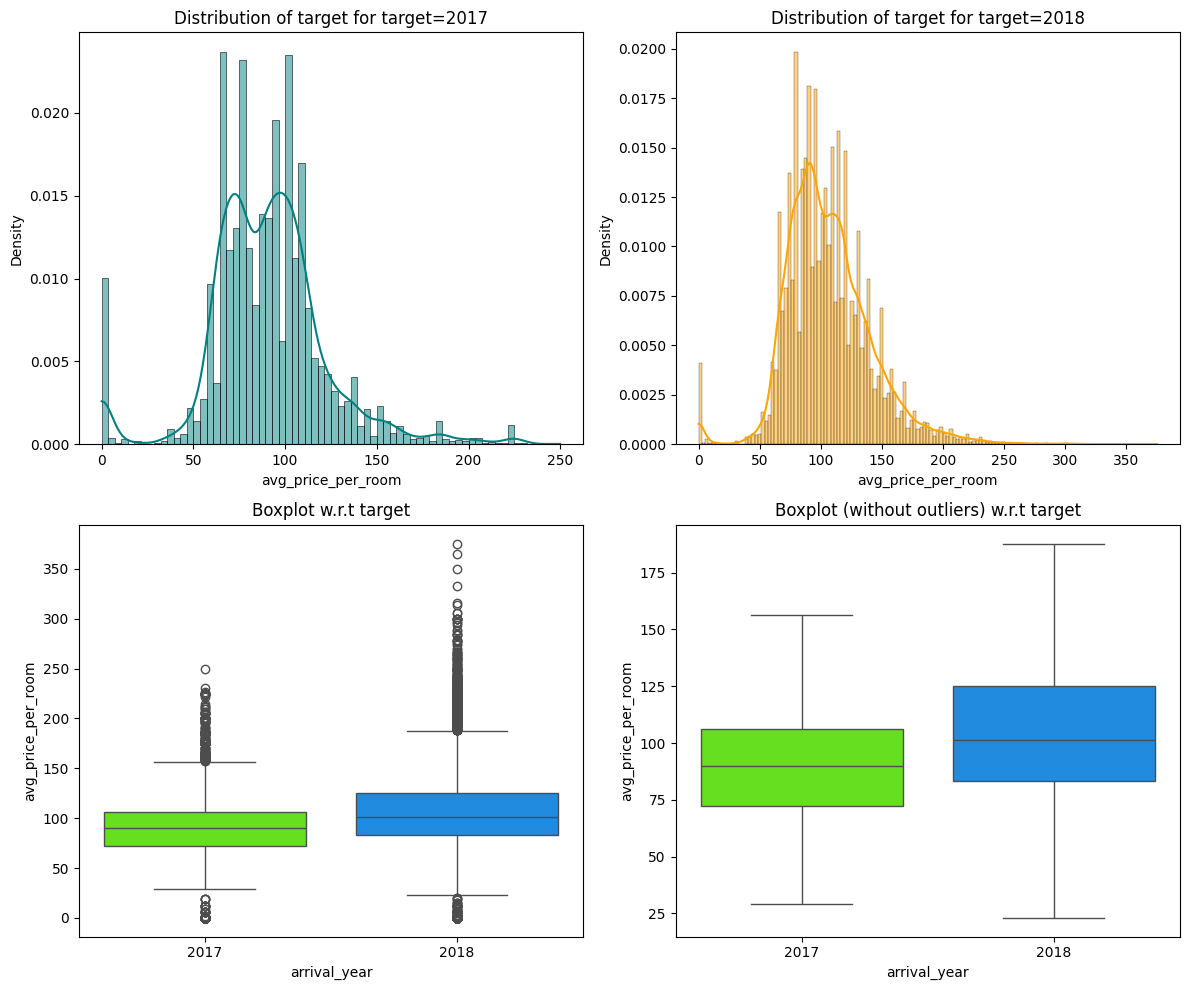

In [ ]:
# Relationship between price of the room and year
distribution_plot_wrt_target(data, 'avg_price_per_room', 'arrival_year');

* The average price for a room has increased in variance.
* We can observe how the median price for a room has increased in a year. It is expected for hotel prices to increase through the years.

#### Month of the year and price per room

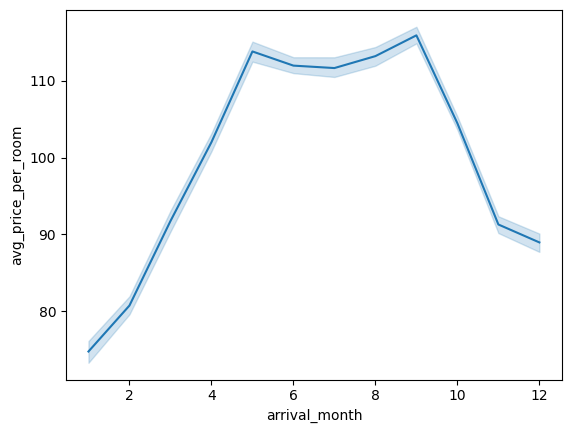

In [ ]:
# Relation between month of the year and average price
sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room');

* Prices are higher in the months with more arrivals (peak season).

Let's see how market segment arrivals vary by month.

#### Month and market segment type

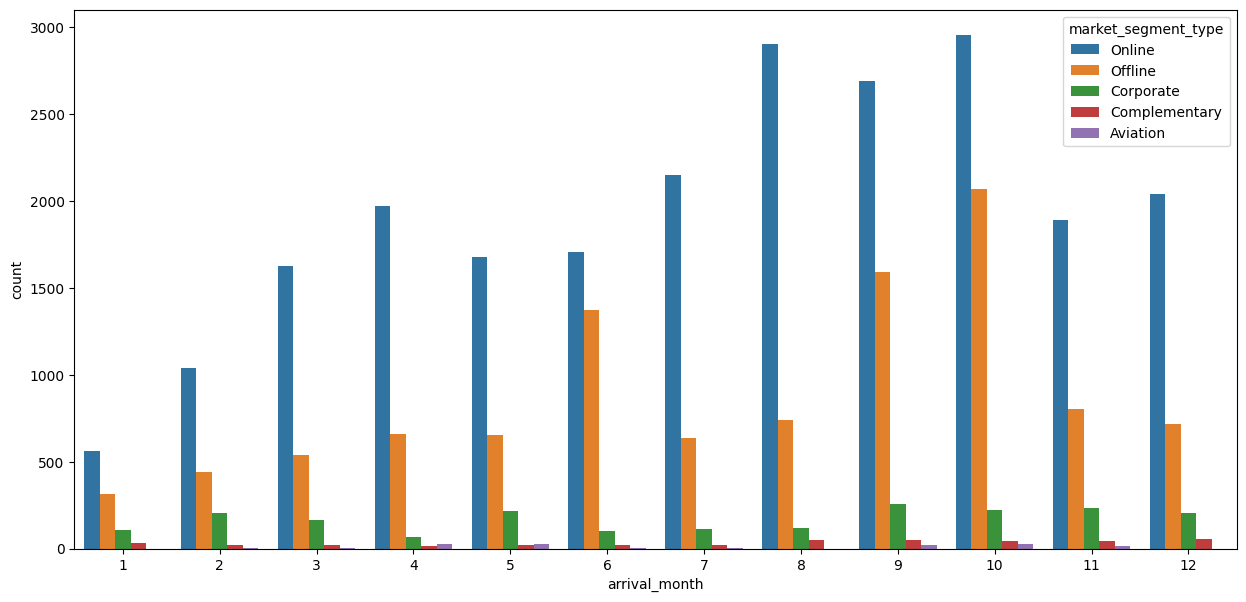

In [ ]:
# Booking counts based on segment and month of the year
plt.figure(figsize=(15,7))
sns.countplot(data=data, hue='market_segment_type', x='arrival_month');

* There is no clear relation between arrival month and market segment.
* This graph matches the overall count of arrivals per month.

Let's see if the prices vary by the amount of guests.

#### Average price and amount of guests

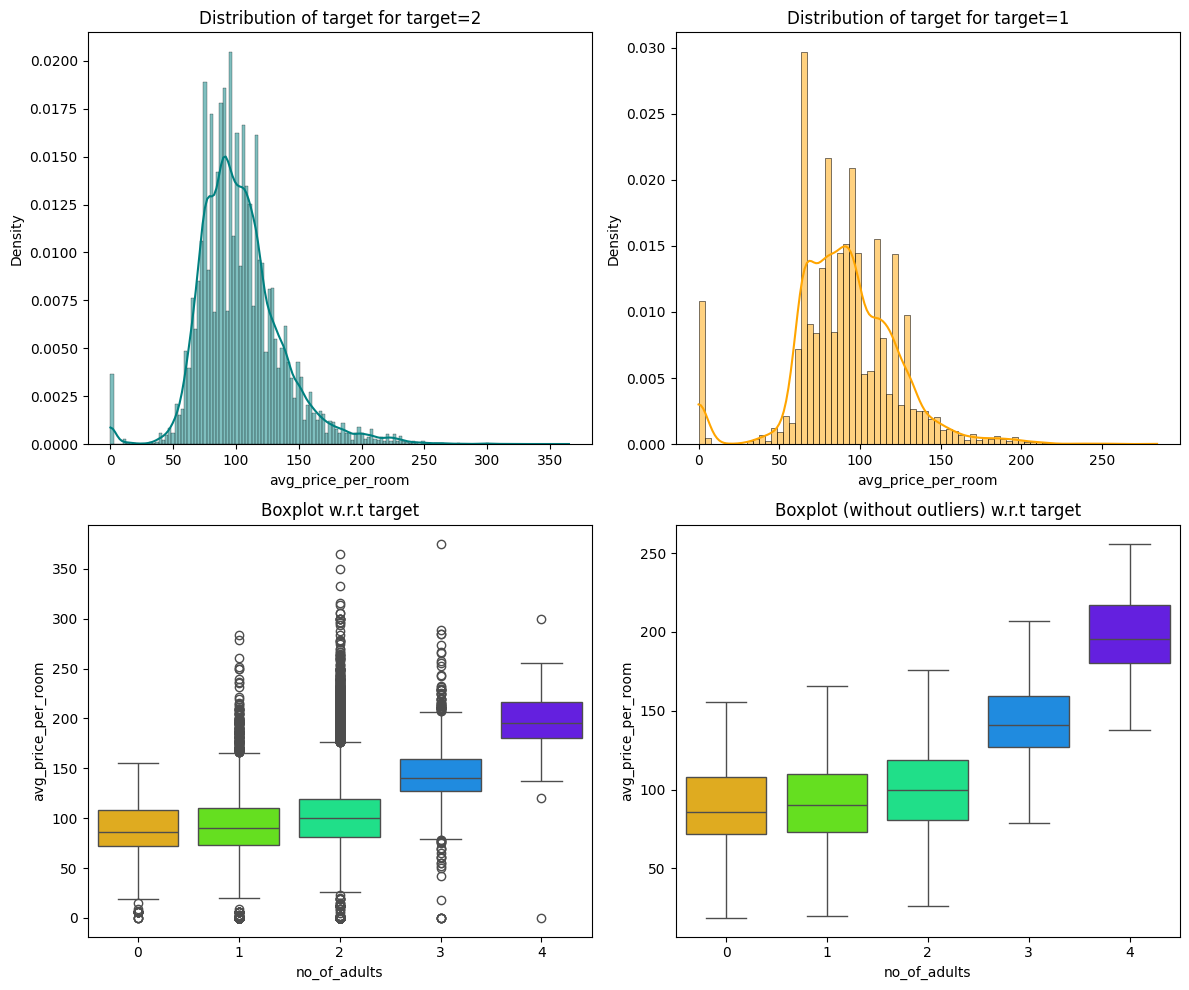

In [ ]:
# Relation between price per room and amount of adults
distribution_plot_wrt_target(data, 'avg_price_per_room', 'no_of_adults')

* The average price per room increases significantly for bookings with 3 and 4 adults.

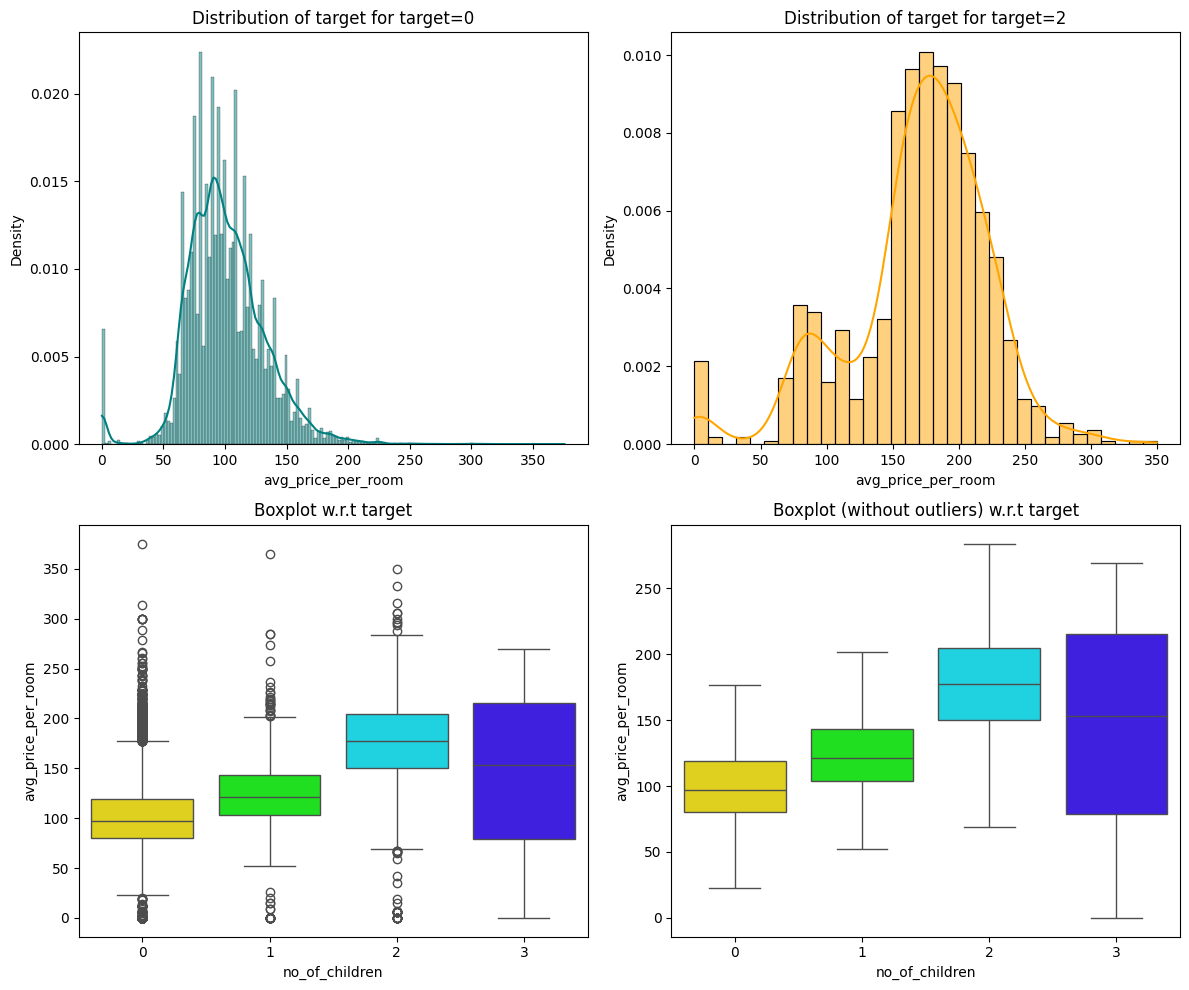

In [ ]:
# Relation between price and amount of children per booking
distribution_plot_wrt_target(data, 'avg_price_per_room', 'no_of_children')

* The average price increases as the amount of children also increases.
* The price increases most for bookings with 2 children.

In [ ]:
# Creating a new variable with the total amount of adults and children per booking
data1 =data.copy()
data1['total_guests']= data['no_of_adults'] + data['no_of_children']
data1

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4             48          2018              4            11   
...          ...           ...            ...           ...   
36270         85          2018              8             3   
36271        228          2018             10            17   
36272        148          2018              7             1   
36273         63          2018              4            21   
36274        207          2018             12            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
36270              Online               0                             0   
36271              Online               0                             0   
36272              Online               0                             0   
36273              Online               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0            65.00000   
1                                         0           106.68000   
2                                         0            60.00000   
3                                         0           100.00000   
4                                         0            94.50000   
...                                     ...                 ...   
36270                         

In [ ]:
# Creating a new variable for total amount of guests
guests=data1.groupby(['total_guests'])

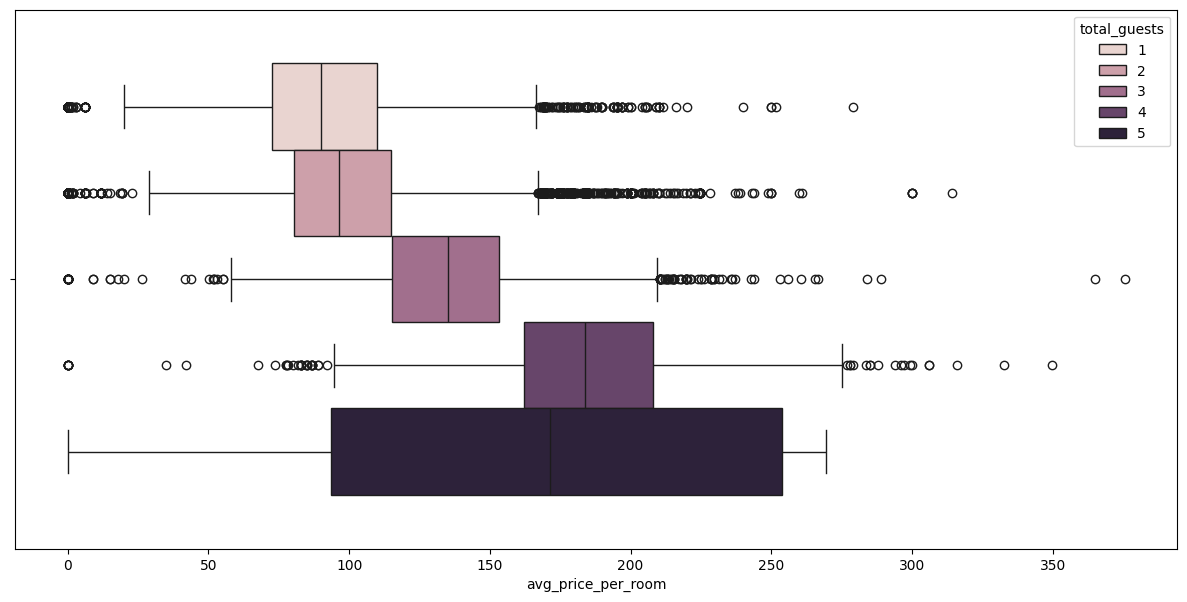

In [ ]:
# Relation between price and total amount of people per booking
plt.figure(figsize=(15,7))
sns.boxplot(data=data1, hue='total_guests', x='avg_price_per_room');

* The average price increases as the amount of guests increases.
* All boxplots have outliers on both ends except for that with a total of 5 guests.
* Bookings with 4 guests are overall the most expensive.

Let's see if the price per room also increases with the amount of special requests.

#### Number of special request and average price per room

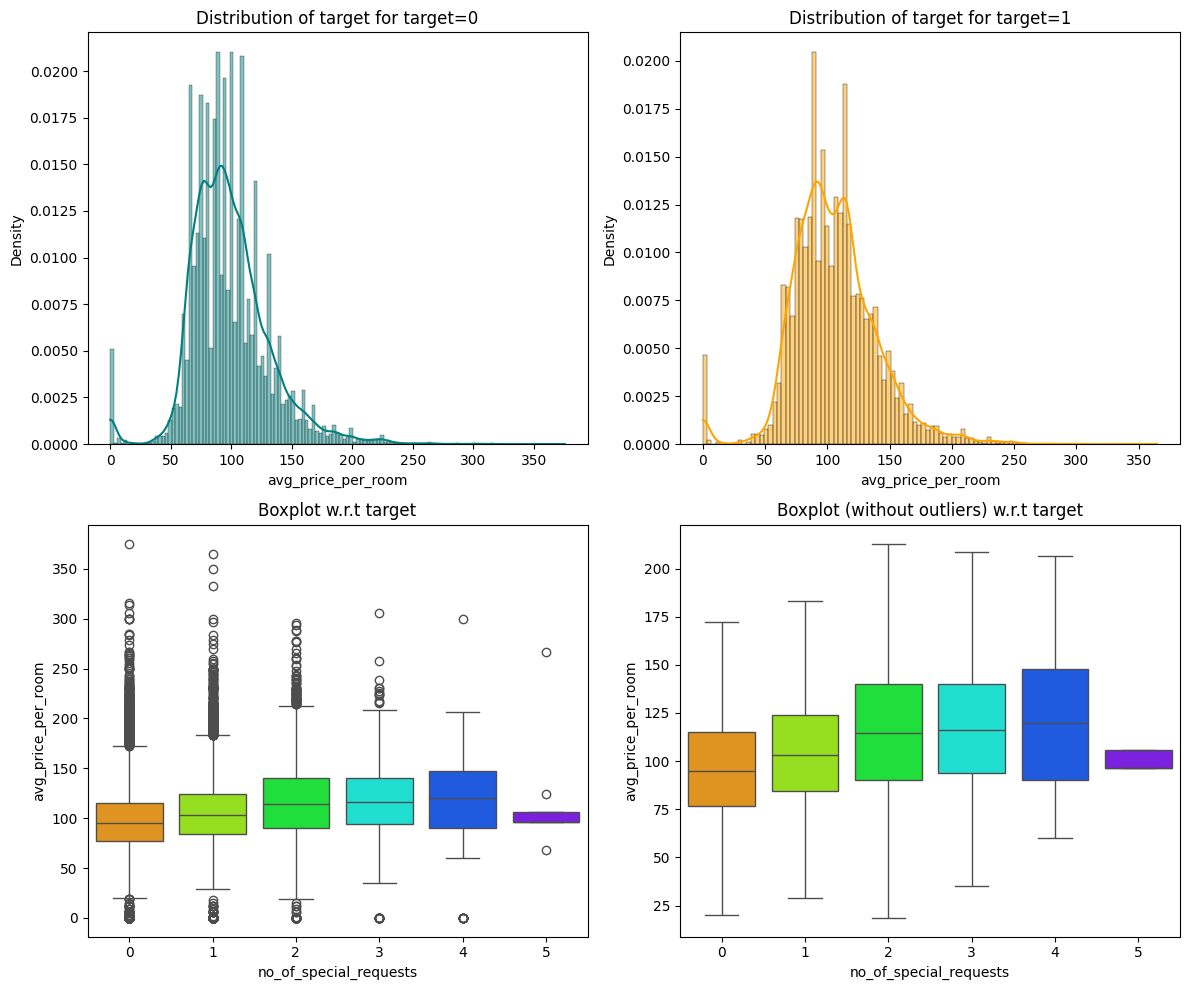

In [ ]:
# Relation between price and number of requests
distribution_plot_wrt_target(data, 'avg_price_per_room', 'no_of_special_requests')

* It is clear that bookings with less amount of requests have a bigger variance in price. This could be due to having more options in room types to choose from.
* The more special requests the less variance but also the higher the median price.
* Lower booking cancellations with higher requests could be due to having less options for those guests.

Let's continue analyzing the impact of booking status with other variables.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [ ]:
# Looking if there are any missing values
data.isnull().values.any()

False

* There are no missing values in the dataset.

### Feature engineering

* Column 'Booking_ID' has already been dropped.
* Dependent variable (booking_status) is of object type, we will change this to a binary variable.

In [ ]:
# Changing booking status data type
data['booking_status'] = data['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

* 'booking_status' has been changed from object type to a binary variable.
* Not canceled bookings are classified as 0, and canceled bookings are classified as 1.

In [ ]:
# Modifying the arrival year to decrease the high numbers
data['arrival_year'] = 2019 - data['arrival_year']
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0             2             10             2             Offline   
1             1             11             6              Online   
2             1              2            28              Online   
3             1              5            20              Online   
4             1              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [ ]:
# Dropping arrival date column since it doesn't provide significant information
data.drop(['arrival_date'], axis=1, inplace=True)
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month market_segment_type  repeated_guest  \
0             2             10             Offline               0   
1             1             11              Online               0   
2             1              2              Online               0   
3             1              5              Online               0   
4             1              4              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  booking_status  
0            65.00000                       0               0  
1           106.68000                       1               0  
2            60.00000                       0               1  
3           100.00000                       0               1  
4            94.50000                       0               1

### Outlier detection and treatment

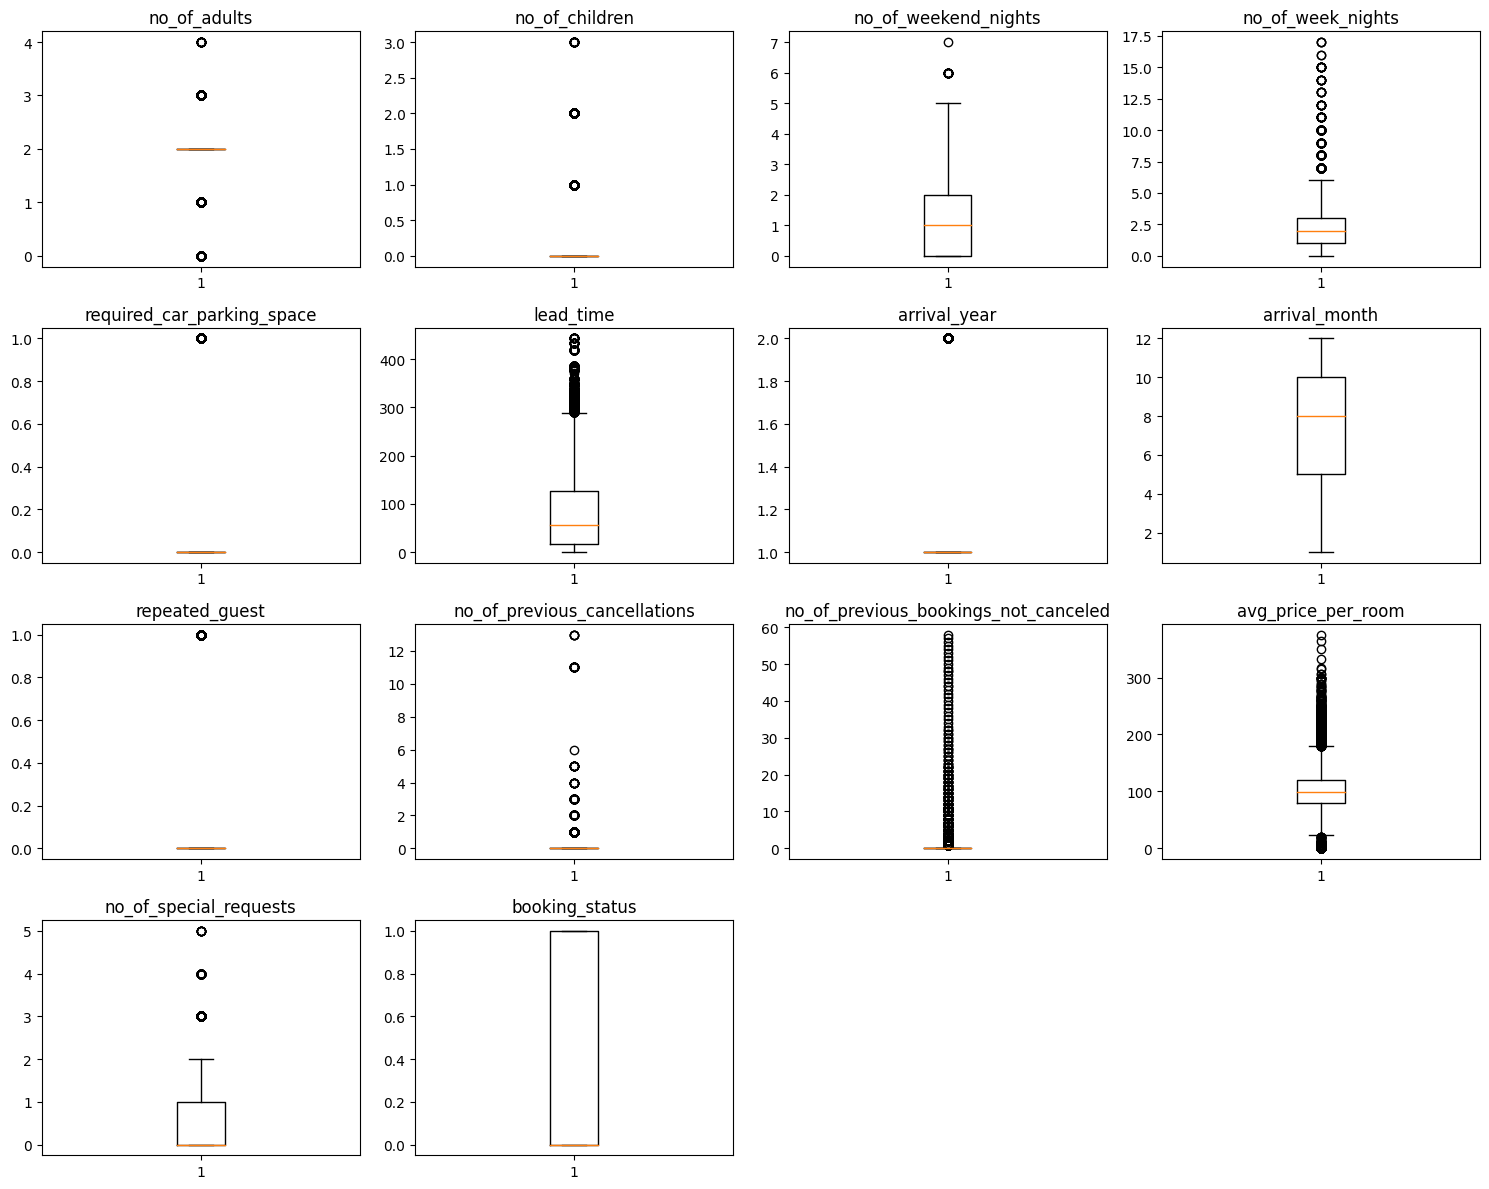

In [ ]:
# Outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Outliers in 'avg_price_per_room' and 'no_of_children' have already been treated.
* We will not treat any other outliers as they are proper values.

### Preparing data for modeling

In [ ]:
# Defining X (independent) and y (dependent) variables
X = data.drop(['booking_status'], axis=1)
y = data['booking_status']

print(X.head())
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month market_segment_type  repe

In [ ]:
# Add the intercept or constant term to the data
X = sm.add_constant(X)

In [ ]:
# Encoding the categorical variables
X = pd.get_dummies(X, dtype=int, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000             2               0                     1   
1 1.00000             2               0                     2   
2 1.00000             1               0                     2   
3 1.00000             2               0                     0   
4 1.00000             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224             2   
1                  3                           0          5             1   
2                  1                           0          1             1   
3                  2                           0        211             1   
4                  1                           0         48             1   

   arrival_month  repeated_guest  no_of_previous_cancellations  \
0             10               0                             0   
1             11               0                             0   
2              2               0                             0   
3              5               0                             0   
4              4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4   

In [ ]:
# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


* We had seen that 67.2% of bookings belong to Not canceled and 32.8% observations belong to Canceled bookings. This is preserved in the train and test sets.

## EDA

* We will not reexplore the data once again after manipulating it since not significant changes were made.
* Data was explored and manipulated during the inital EDA.

## Model building
### Model evaluation criterion


Model can make wrong predictions as:



1. Model predicted a booking to be canceled but in reality the booking was canceled.
2. Model predicted a booking to not be canceled but in reality the booking was canceled.

#### Which case is more important?

* If we predict that a guest will not cancel but in reality, the booking is canceled, then the hotel will have to bear the cost of having an empty room.
* If we predict that the booking will be canceled but in reality, it is no canceled, then the hotel might double book a room or deal with making arrangements for the guests.
* Both situations are equally important.

#### How to reduce this loss?

* Due to false negatives and false positives having a high cost for the hotel. We need to look at a balance metric such as F1 score.
* We will maximize F1 score.

##### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # Counding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # To compute Accuracy
    recall = recall_score(target, pred)  # To compute Recall
    precision = precision_score(target, pred)  # To compute Precision
    f1 = f1_score(target, pred)  # To compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial logistic Regression model

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
# Fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.3292
Time:                        09:00:13   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9716      0.268     -7.345      0.000      -2.498      -1.445
no_of_adults                             0.1140      

**Observations:**
* Negative values of the coefficient show that the probability of a guest canceling a reservation decreases with the increase of the corresponding value.
* Positive values of the coefficient show that the probability of a guest canceling a booking increases with the increase of the corresponding value.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
* But sometimes p-values change after dropping a variable, so we'll drop them one by one using a loop.
  * Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  * Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  * Repeat the above two steps till there are no columns with p-value > 0.05.

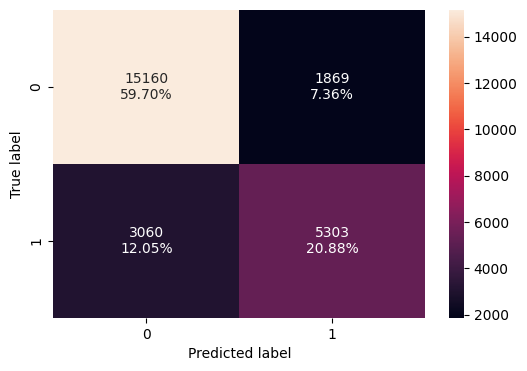

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80588 0.63410    0.73940 0.68272

**Observations:**
* The f1_score of the model is approximately 0.68 and we will try to maximize it further.
* The variables used to build the model might contain multicollinearity, which will affect the p-values. We will remove multicollinearity from the data to get reliable coefficients and p-values.

### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
# Checking the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                  335.74684
no_of_adults                             1.35075
no_of_children                           2.09311
no_of_weekend_nights                     1.06866
no_of_week_nights                        1.09542
required_car_parking_space               1.03993
lead_time                                1.39475
arrival_year                             1.43189
arrival_month                            1.27408
repeated_guest                           1.78319
no_of_previous_cancellations             1.39562
no_of_previous_bookings_not_canceled     1.65197
avg_price_per_room                       2.06860
no_of_special_requests                   1.24767
type_of_meal_plan_Meal Plan 2            1.27251
type_of_meal_plan_Meal Plan 3            1.02524
type_of_meal_plan_Not Selected           1.27294
room_type_reserved_Room_Type 2           1.10572
room_type_reserved_Room_Type 3           1.00328
room_type_reserved_Room_Type 4           1.36324
room_t

* We ignore the VIF for dummy variables and the intercept.
* We observe that there is no multicollinearity present in the data.
* Hence, The values of coefficient and p-values are reliable.
* Let's remove the insignificant variables (p-value > 0.05) from data.

### Removing insignificant variables (p-value > 0.05)

In [ ]:
# Summary of initial logistic regression model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.3292
Time:                        09:00:15   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9716      0.268     -7.345      0.000      -2.498      -1.445
no_of_adults                             0.1140      

In [ ]:
# Initial list of columns
cols = X_train.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = X_train[cols]

    # Fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
# Creating new variables without high p-values
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

### Default logistic regression model (no multicollinearity or high p-values)

In [ ]:
# Building a new model without high p-values
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.3282
Time:                        09:00:18   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4103      0.129    -18.665      0.000      -2.663      -2.157
no_of_adults                       0.1088      0.037      2.914      0.

* Now, no variable has a p-value greater than 0.05, so we'll consider the features in X_train1 as the final ones and lg1 as final model.

### Coefficient interpretations from default model

* Coefficients of number of guests, number of nights, lead time, previous cancellations, price per room, and meal plans are positive. An increase in these will lead to a higher chance of a guest cancelling a reservation.
* Required parking, repeating guest, number of special requests, room types 6 and 7, and offline market segments are high negative coefficients. An increase in these will lead to a lower chance of a booking cancellation.

### Converting coefficients to odds

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# Converting coefficients to odds
odds = np.exp(lg1.params)

# Finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.08979       1.11491         1.16546               1.11470   
Change_odd% -91.02081      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              0.63615        0.95839         0.06478   
Change_odd%     -36.38478       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

### Coefficient interpretation from odds

* Number of adults: Holding all other features constant a 1 unit change in number of adults, will increase the odds of a customer cancelling a booking by 1.11 times or a 11.49% increase in odds.
* Number of children: Holding all other features constant a unit change in number in children will increase the odds of a guest cancelling a reservation by 1.17 times or a 16.55% increase in odds.
* Number of weekend nights: Holding all other features constant a unit change in number in number of weekend nights will increase the odds of a guest cancelling by 1.11 times or a 11.47% increase in odds.
* Number of week nights: Holding all other features constant a unit change in week nights will increase the odds of a guest cancelling by 1.04 times or a 4.26% increase in odds.
* The odds of a guest who chooses meal plan 2 cancelling their booking is 1.18 times less than a customer who chooses any other meal plan or a 17.85% fewer odds than a guest with any other meal plan.

Interpretation for other attributes can be done similarly.

### Checking performance of default model

* Checking model performance on the training set for the new model with no multicollinearity, no high p-values, and coefficients converted to odds.

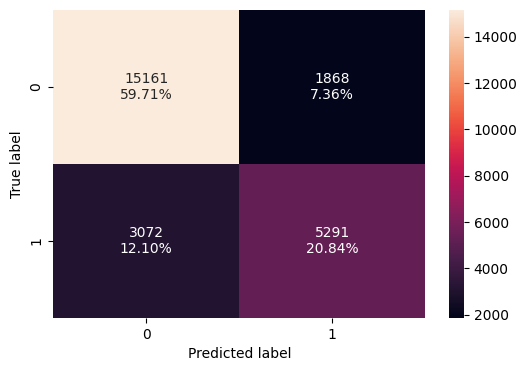

In [ ]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

* There is no significant change in the model performance as compared to initial model.

### AUC-ROC on training set

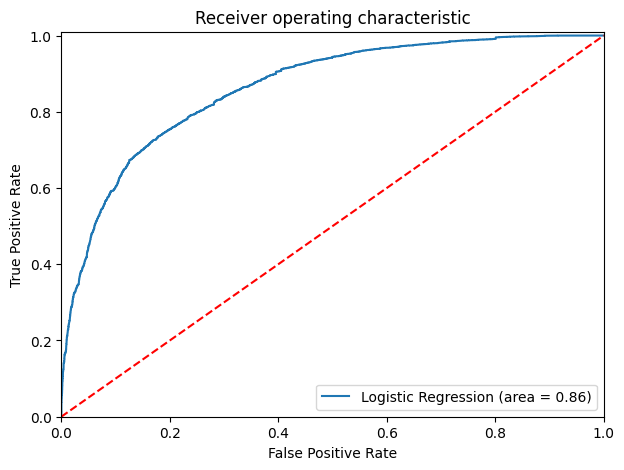

In [ ]:
# ROC curve on training set

logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is performing well on the training set.

### Model performance improvement
* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708127


### Checking model performance on training set with optimal threshold AUC-ROC (0.37)

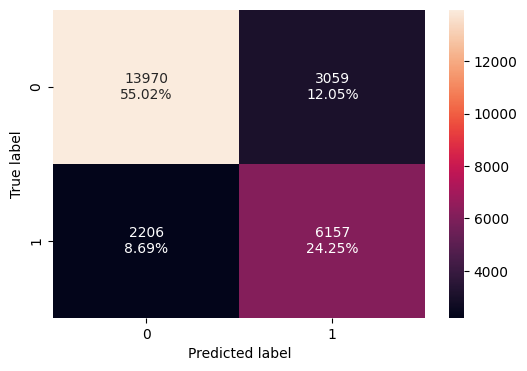

In [ ]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# Checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

* Model performance has improved.
* Model is giving an f1 score of 0.70 as compared to initial model which was giving f1 score of 0.68.
* Recall has significantly increased from 0.63 to 0.74.

### Using Precision-Recall curve to see if we can find a better threshold

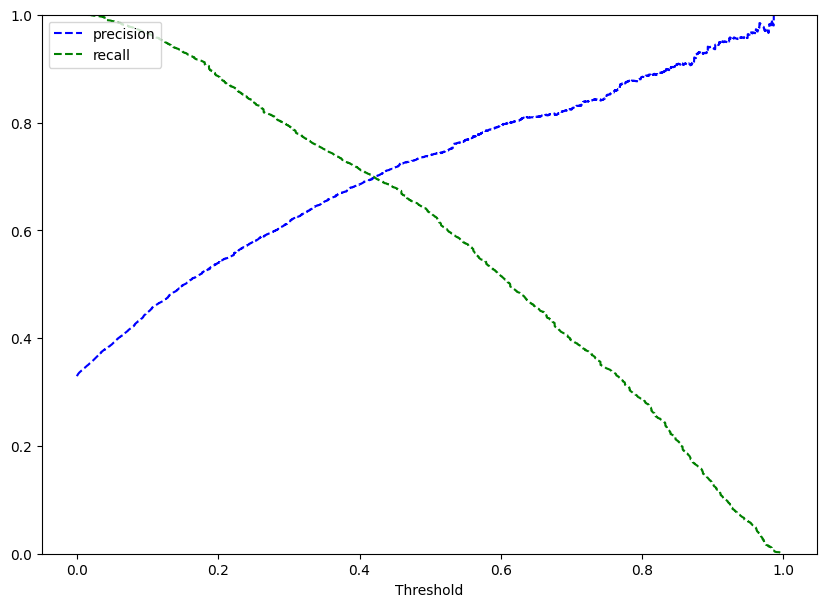

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.41 we will get balanced recall and precision.

In [ ]:
# Setting optimal threshold
optimal_threshold_curve = 0.41

### Model performance on training set with Precision-Recall threshold (0.41)

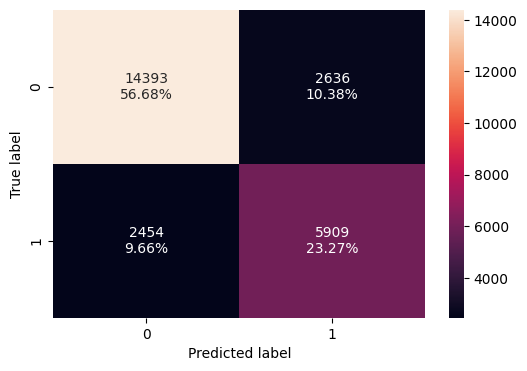

In [ ]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
# Metrics for train set with 0.41 threshold
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.79954 0.70656    0.69152 0.69896

* F1 score has improved (0.69)as compared to the initial model (0.68).
* Model has a better performance with 0.37 threshold found using AUC-ROC curve.

### Default model performance on test set

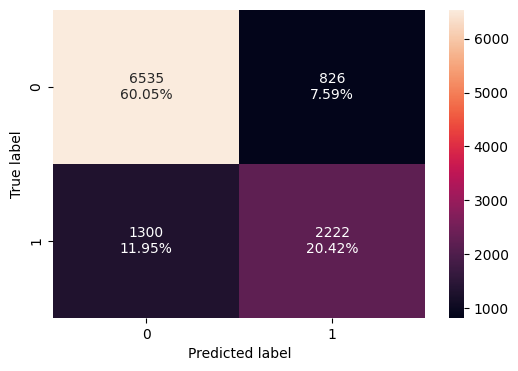

In [ ]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
# Metrics for test set
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)

print("Training performance:")
log_reg_model_test_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

* F1 score decreased as compared to training set.
* Recall reamins similar as compared to default training set.

### AUC-ROC on test set

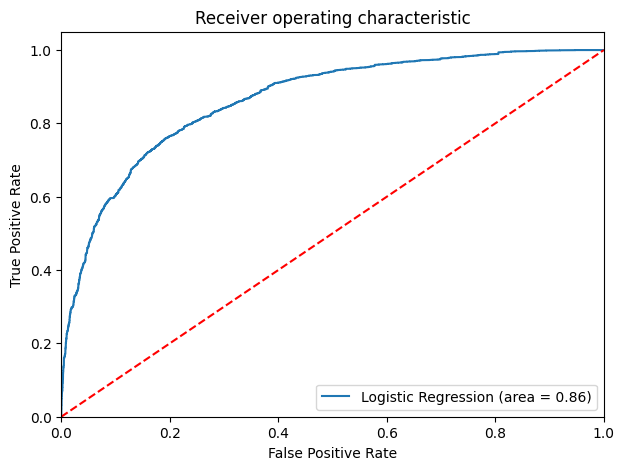

In [ ]:
# ROC curve on test set
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is performing well on test set.

### Checking model performance on test set with optimal threshold AUC-ROC (0.37)

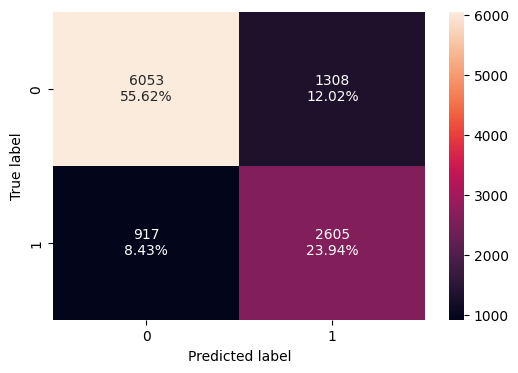

In [ ]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# Checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

* F1 score and Recall improved as compared to the previous models on test set.
* These metrics are similar to those on training set with threshold 0.37.

### Model performance on test set with Precision-Recall threshold (0.41)

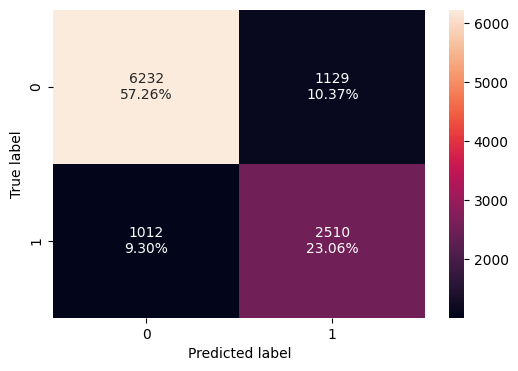

In [ ]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
# Checking performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80327 0.71266    0.68975 0.70102

* F1 score increased as compared to test model with threshold 0.37.
* F1 score increased as compared to training set with threshold 0.41.

## Model performance summary

In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80545   
Recall                                   0.63267   
Precision                                0.73907   
F1                                       0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.41 Threshold  
Accuracy                              0.79954  
Recall                                0.70656  
Precision                             0.69152  
F1                                    0.69896

In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                          0.80465                             0.79555   
Recall                            0.63089                             0.73964   
Precision                         0.72900                             0.66573   
F1                                0.67641                             0.70074   

           Logistic Regression-0.41 Threshold  
Accuracy                              0.80327  
Recall                                0.71266  
Precision                             0.68975  
F1                                    0.70102

## Model performance evaluation

* Almost all three models are performing well on both train and test data without the problem of overfitting.
* All models are giving a generalized performance on training and test sets.
* The models with 0.37 and 0.41 thresholds are giving slightly higher F1 scores for a more balanced recall and precision. This will help the hotel maintain a balance in identifying potential cancellations.
* Selecting the default model with a low recall and higher precision will help the hotel make arrangements for the guests.
* Using the model with 0.37 threshold will give the hotel higher recall and low precision. This will help the hotel identify guests that will cancel their booking so the loss of resources is less.
* We will select the model with 0.37 as our final model since it provides higher F1 score, but also higher recall compared to the other models.

### Final model summary

In [ ]:
# Printing the default model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.3282
Time:                        09:00:23   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4103      0.129    -18.665      0.000      -2.663      -2.157
no_of_adults                       0.1088      0.037      2.914      0.

**Observations:**
* Coefficients of number of guests, number of nights, lead time, previous cancellations, price per room, and meal plans are positive. An increase in these will lead to a higher chance of a guest cancelling a reservation.
* Required parking, repeating guest, number of special requests, room types 6 and 7, and offline market segments are high negative coefficients. An increase in these will lead to a lower chance of a booking cancellation.

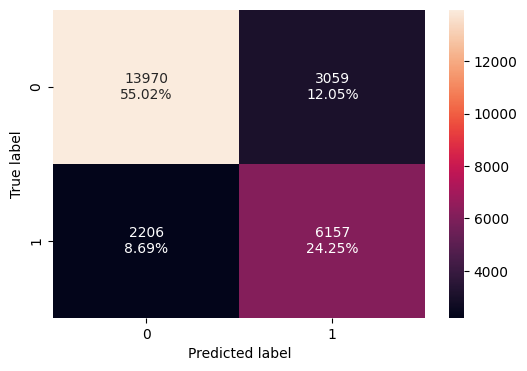

In [ ]:
# Printing matrix with 0.37 threshold (high recall and F1 score)
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

**Observations:**
* True negative values according to this model show that 55.02% of the bookings are predicted to not be canceled.
* True positive values in this model show that 24.25% of the guests will cancel their booking.
* False negatives tell us that 8.69% of the reservations were thought to not be canceled, but in reality they are canceled.
* False positives according to this model tell us that 12.05% of the reservations were thought to be canceled when in reality they were not.
* In this model, there is a balance between false negatives and false positives, helping the hotel maintain a balance. Showed by the F1 score.
* Having a higher prediction of false negatives than false positives will also hep the hotel prepare for bookings that are potentially canceled. Showed with recall score.

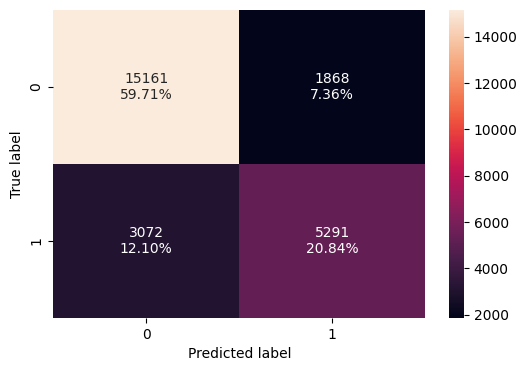

In [ ]:
# Printing confusion matrix for default threshold (high precision)
confusion_matrix_statsmodels(lg1, X_train1, y_train)

**Observations:**
* A similar interpretation of this model can be done as with the previous one.
* This model has a higher precision than the rest.
* Having a higher false negative percentage than a false positive will help the hotel plan and prepare for those guests that ended canceling their booking.

## Building a Decision Tree model

* The data has already been split and prepared previously.
* We will build another model using the DecisionTreeClassifier function using its default criterion.
* The decision tree model will use the same model evalution criterion as the logistic regression model.
* However, we will create different metrics and confusion matrix so that they are not the same in both models.

### Creating functions needed to calculate metrics and confusion matrix

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # Compute Accuracy
    recall = recall_score(target, pred)  # Compute Recall
    precision = precision_score(target, pred)  # Compute Precision
    f1 = f1_score(target, pred)  # Compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Defining a function to plot the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building default decision tree

In [ ]:
# Building the default decision tree
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Default model performance on training set

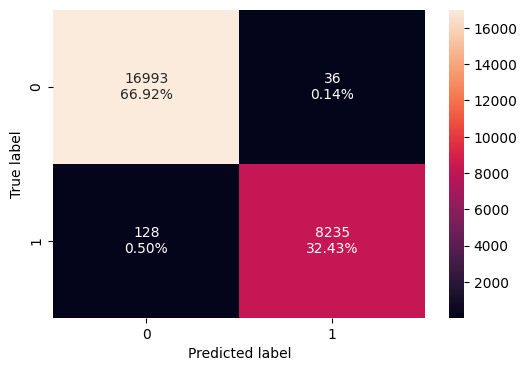

In [ ]:
# Printing the confusion matrix
confusion_matrix_sklearn(dTree, X_train, y_train)

In [ ]:
# Printing model metrics
decision_tree_perf_train = model_performance_classification_sklearn(dTree, X_train, y_train)

decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99354 0.98469    0.99565 0.99014

* As expected the tree has split almost completely and metric scores are almost pure.

### Default model performance on test set

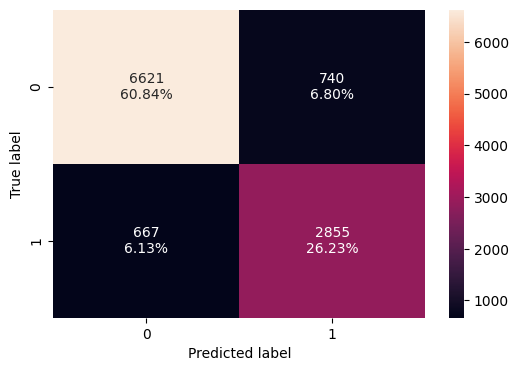

In [ ]:
# Printing the confusion matrix
confusion_matrix_sklearn(dTree, X_test, y_test)

In [ ]:
# Printing model metrics
decision_tree_perf_test = model_performance_classification_sklearn(dTree, X_test, y_test)

decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87072 0.81062    0.79416 0.80230

* This model doesn't perform as well as it does on the training set.
* Model is giving good generalized results on training and test set.

### Visualizing the default decision tree

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


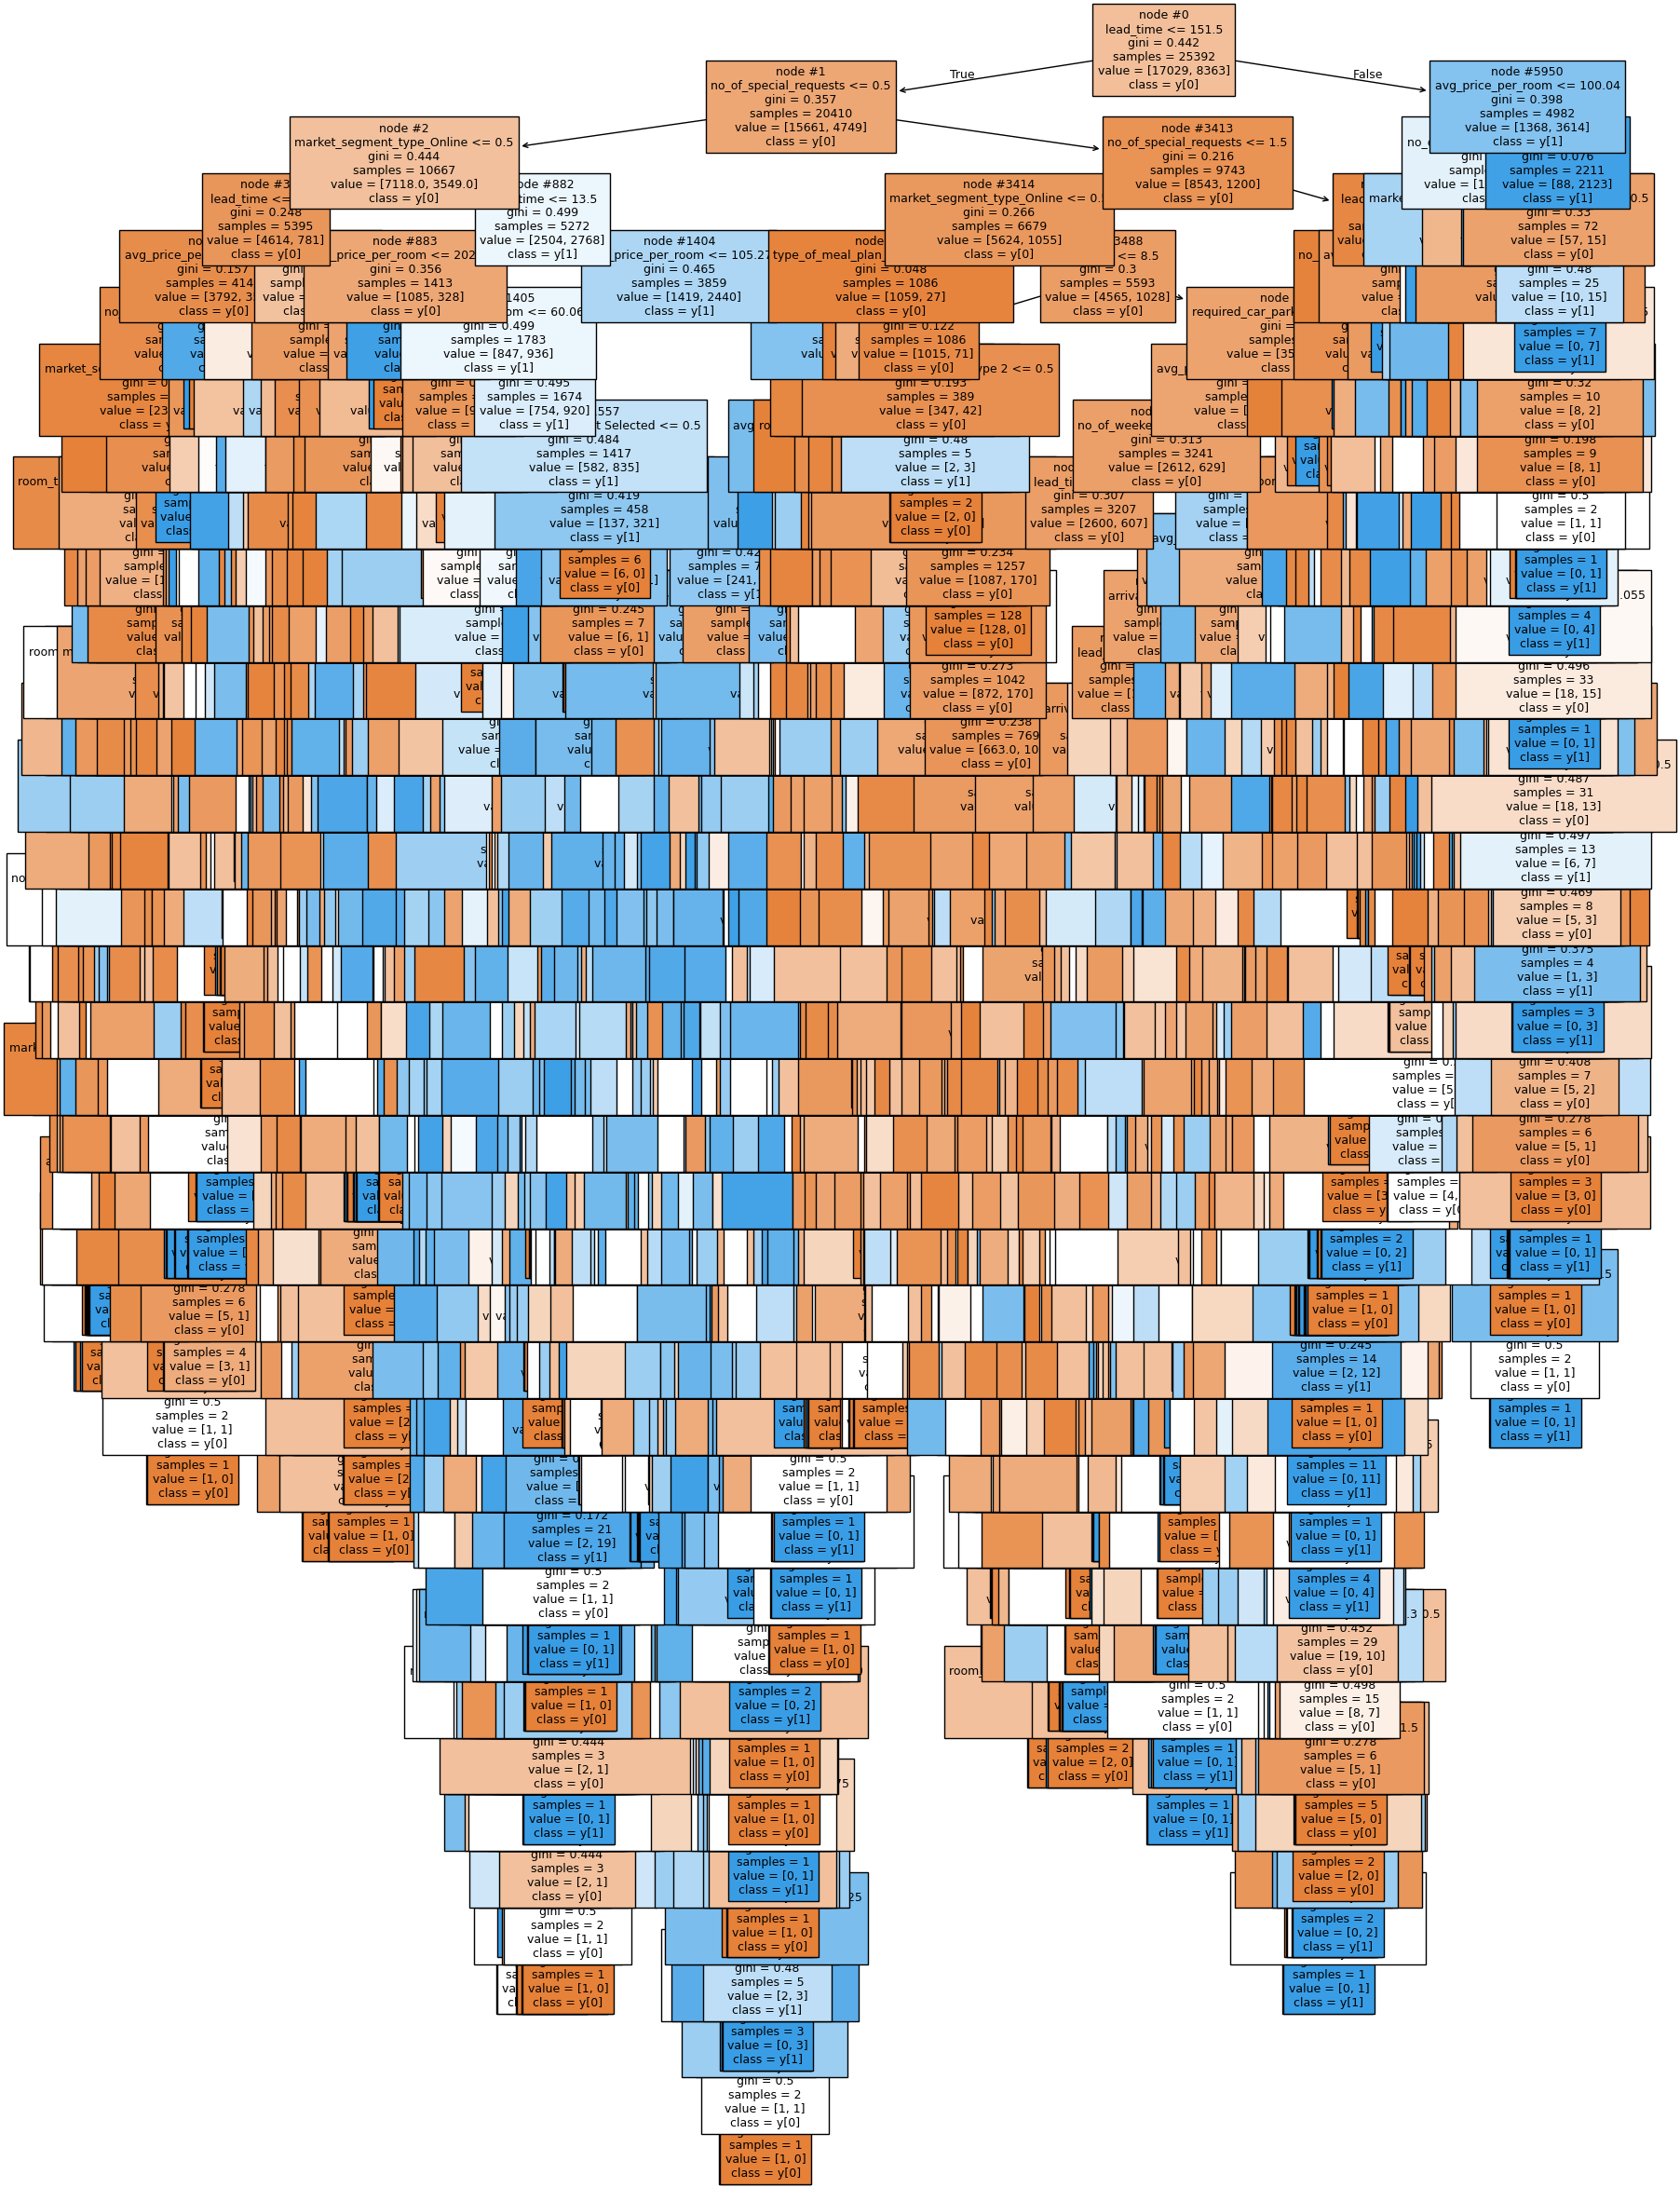

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

In [ ]:
# Importance of features in the tree building (The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.38170
avg_price_per_room                   0.19508
market_segment_type_Online           0.09477
arrival_month                        0.07886
no_of_special_requests               0.06854
no_of_week_nights                    0.05565
no_of_weekend_nights                 0.03835
no_of_adults                         0.03103
arrival_year                         0.01256
type_of_meal_plan_Not Selected       0.00824
room_type_reserved_Room_Type 4       0.00823
required_car_parking_space           0.00716
no_of_children                       0.00526
type_of_meal_plan_Meal Plan 2        0.00418
room_type_reserved_Room_Type 2       0.00231
room_type_reserved_Room_Type 5       0.00185
market_segment_type_Offline          0.00176
market_segment_type_Corporate        0.00142
room_type_reserved_Room_Type 6       0.00126
no_of_previous_bookings_not_canceled 0.00055
room_type_reserved_Room_Type 7       0.00051
repeated_g

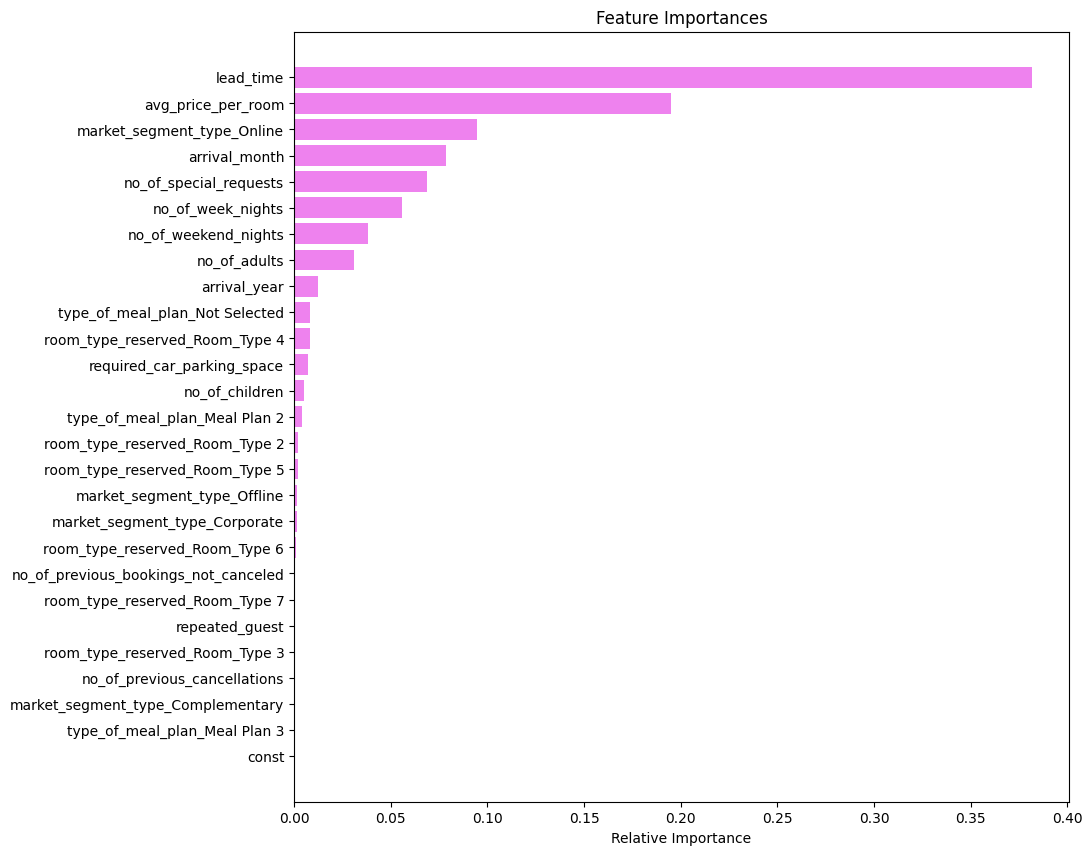

In [ ]:
# Printing a visual of important features
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, 'lead_time' is the most important variable for predicting a guest to cancel.
* 'Avg_price_per_room' also has a high importance score.
* Other important variables are 'market_segment_type_Online', 'arrival_month', and 'number_of_special_requests'.

The decision tree model above is very complex, this type of tree often overfits.

**We will need to prune the tree**. But before we do that, we will balance the class weights.

### Decision tree with class_weights

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
dTree = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

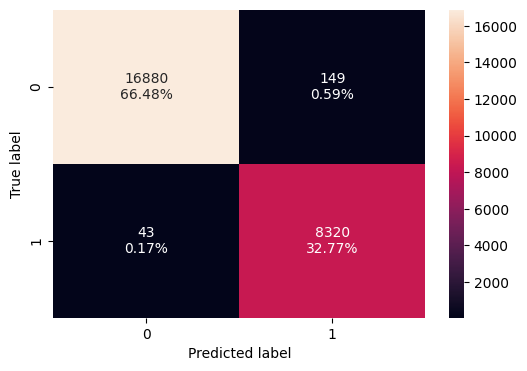

In [ ]:
# Confusion matrix for training set
confusion_matrix_sklearn(dTree, X_train, y_train)

In [ ]:
# Metrics for train set with class weights
decision_tree_perf_train = model_performance_classification_sklearn(dTree, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99244 0.99486    0.98241 0.98859

* The model is able to almost perfectly classify all the data points on the training set.
* Metrics have decreased slightly compared to initial model.

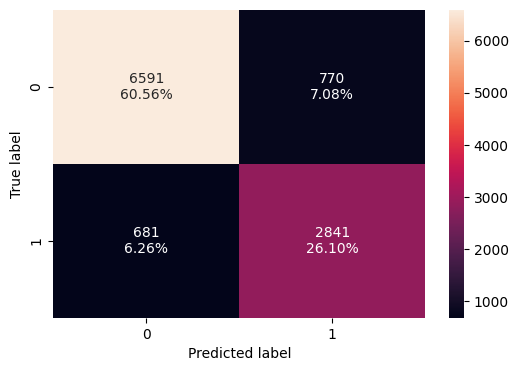

In [ ]:
# Confusion matrix for test set
confusion_matrix_sklearn(dTree, X_test, y_test)

In [ ]:
# Metrics for test set with class weights
decision_tree_perf_test = model_performance_classification_sklearn(dTree, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86667 0.80664    0.78676 0.79658

* There is a big disparity in performance of the model on training and test sets. This suggests that the model is overfitting.

**We will use pruning techniques to reduce overfitting.**

### Reducing overfitting: Pre-pruning

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "criterion": ["entropy", "gini"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations (as decided at the beginning)
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=75, min_samples_split=10,
                       random_state=1)

### Checking performance of pre-pruned tree

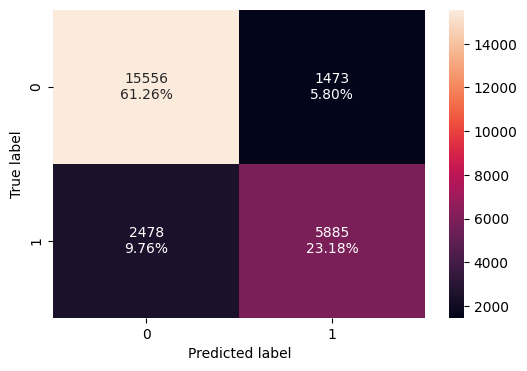

In [ ]:
# Confusion matrix on train set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# Metrics on train set
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)

decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.84440 0.70369    0.79981 0.74868

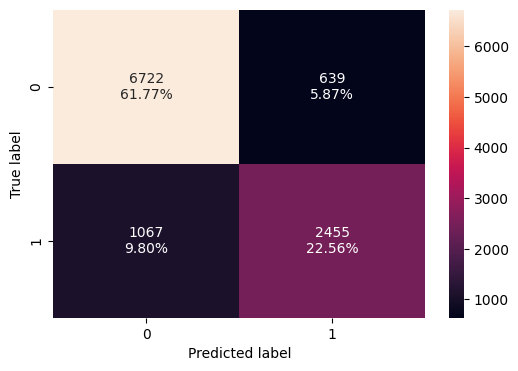

In [ ]:
# Confusion matrix on test set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# Metrics on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)

decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.84324 0.69705    0.79347 0.74214

* The pre-pruned model is giving a generalized result now since the f1 scores on both train and test sets are coming to be around 0.74 which shows that the model is able to generalize well on unseen data.

### Visualizing the pre-pruned tree

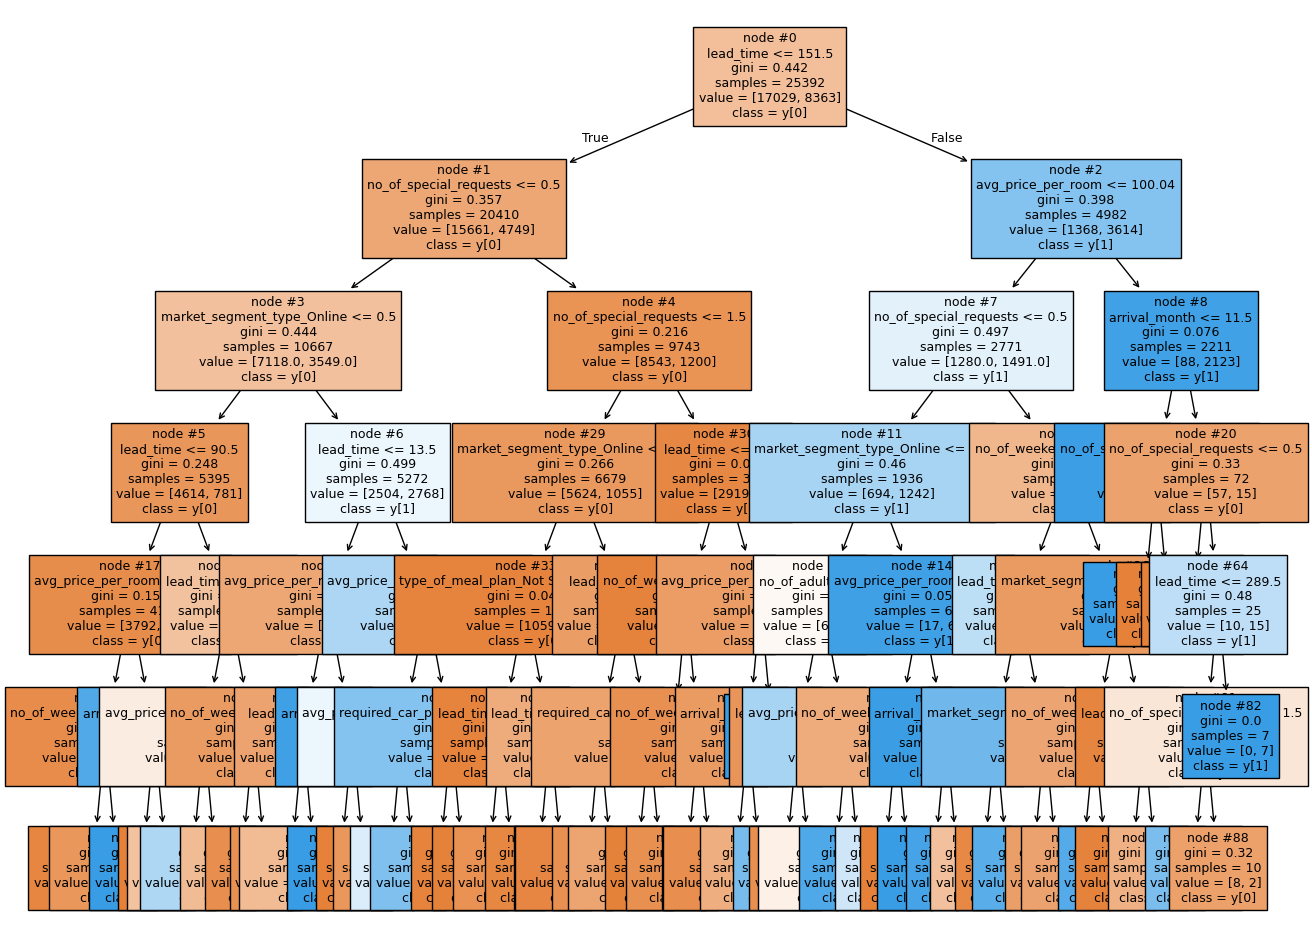

In [ ]:
# Visual of pre-pruned tree
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- weights: [2329.00, 88.00] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- weights: [1461.00, 253.00] class: 0
|   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [0.00, 16.00] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [288.00, 150.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [111.00, 188

* We are getting a simplied tree after pre-pruning.
* Using the above decision rules we can make interpretations from the tree like:
  * If the lead_time is less than or equal to 151.50, the number of special requests is less than or equal to 0.5, market segment type is online, the lead time is less than or equal to 90.5 days, the average price per room is less than or equal to 201.5, then the guest will not cancel.

Interpretations from other decision rules can be made similarly.

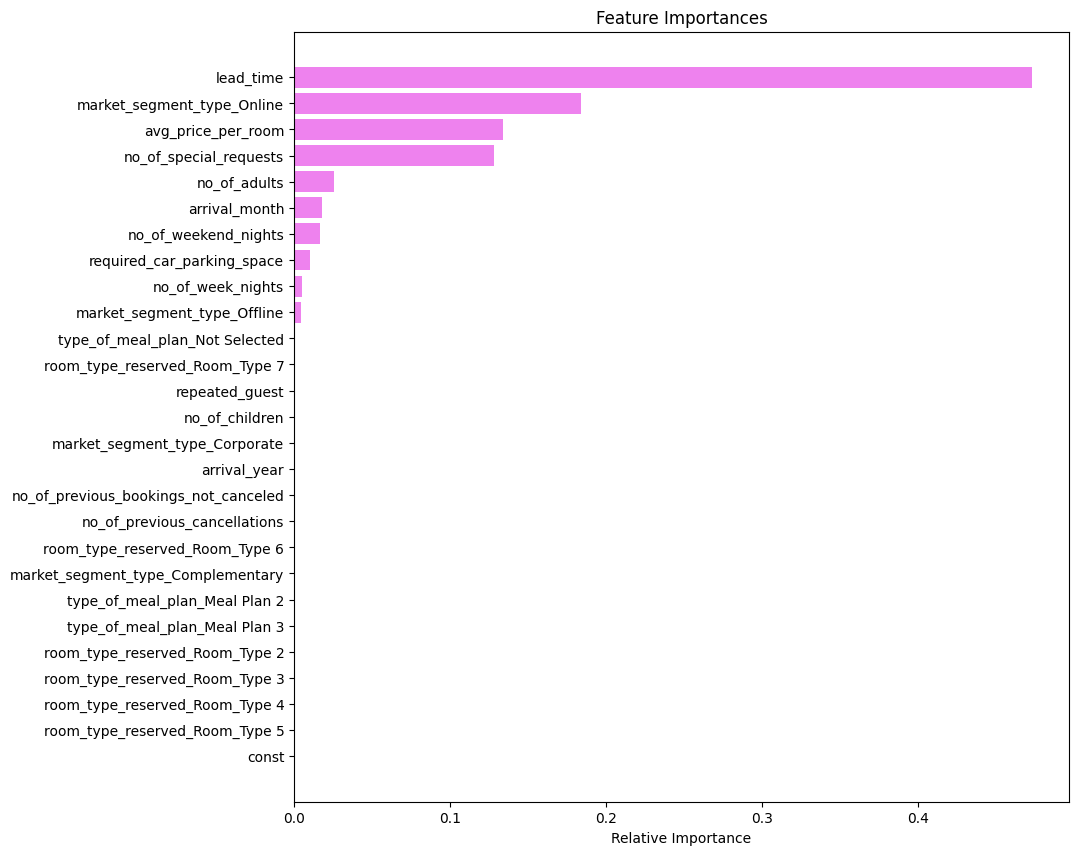

In [ ]:
# Printing a visual of importance of features in the pre-pruned tree

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree, lead time, online market segment, price, and number of special requests are still the most important features.

### Reducing overfitting: Post-pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. **Cost
complexity pruning** provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
# Creating the variables
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# Printing values for ccp_alpha and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00913
1       -0.00000     0.00913
2        0.00000     0.00913
3        0.00000     0.00913
4        0.00000     0.00913
...          ...         ...
1941     0.00890     0.32806
1942     0.00980     0.33786
1943     0.01272     0.35058
1944     0.03412     0.41882
1945     0.08118     0.50000

[1946 rows x 2 columns]

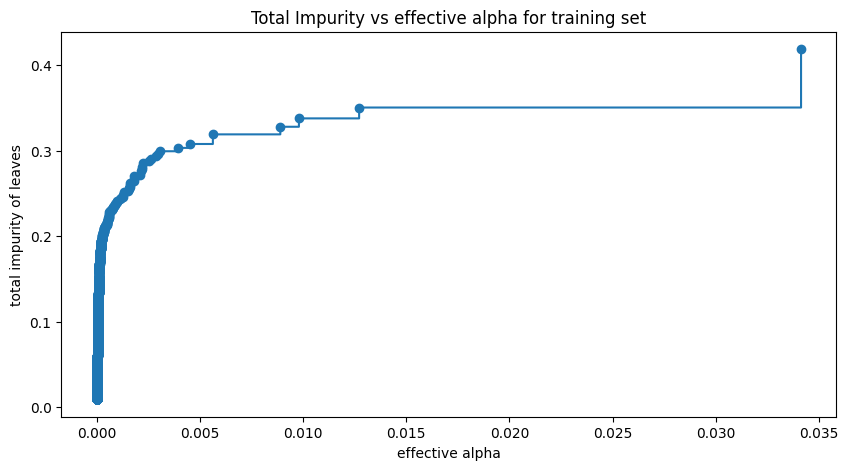

In [ ]:
# Visual of impurities and ccp_alpha for train set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
# Train decision tree with effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136971


* For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

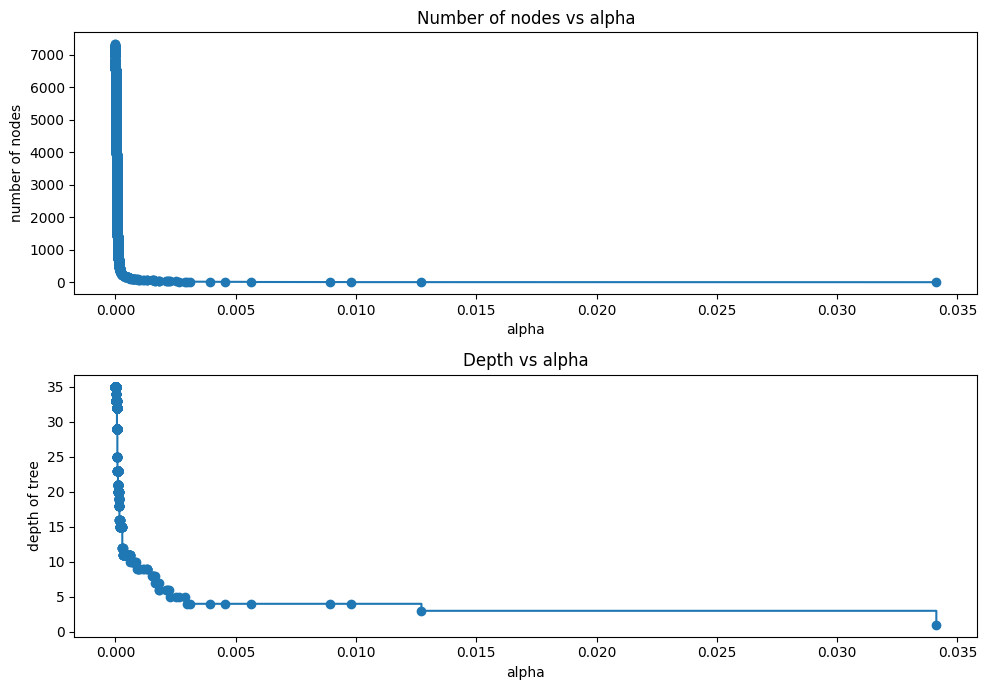

In [ ]:
# Decreasing number of nodes and tree depth as alpha increases
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 score vs alpha for training and testing sets

When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 99% training accuracy and 80% testing f1 score. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [ ]:
# Variable for F1 score vs alpha for train set
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [ ]:
# Variable for F1 score vs alpha for test set
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

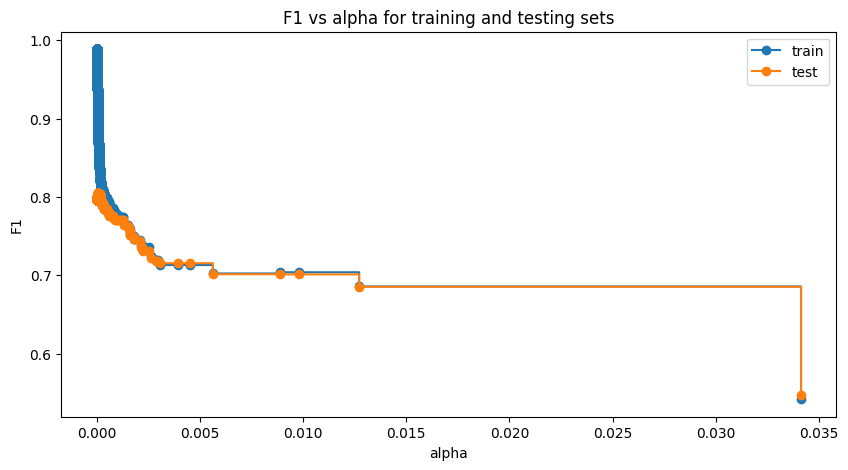

In [ ]:
# Visual F1 vs alpha for train and test sets
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Creating the model where we get highest train and test F1 scores
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=5.859692035437724e-05, class_weight='balanced',
                       random_state=1)


### Model performance on train set for highest F1 score

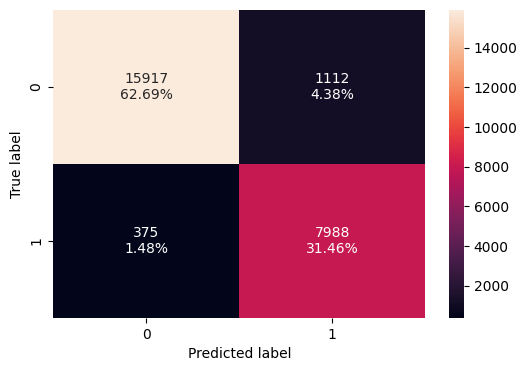

In [ ]:
# Confusion matrix for best model (highest F1)
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
# Metrics for best model (highest F1)
decision_tree_postpruned_train = model_performance_classification_sklearn(
    best_model, X_train, y_train)

decision_tree_postpruned_train

Accuracy  Recall  Precision      F1
0   0.94144 0.95516    0.87780 0.91485

* F1 score has increased significantly as compared to pre-pruned tree.

### Model performance on test set for highest F1 score

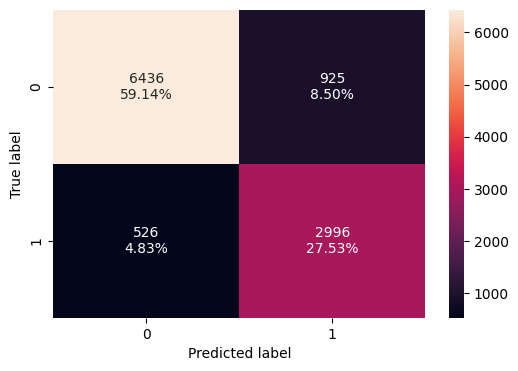

In [ ]:
# Confusion matrix for best model (highest F1)
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
# Metrics for best model (highest F1)
decision_tree_postpruned_test = model_performance_classification_sklearn(
    best_model, X_test, y_test)

decision_tree_postpruned_test

Accuracy  Recall  Precision      F1
0   0.86667 0.85065    0.76409 0.80505

* With post-pruning we get high F1 scores.
* We are getting good generalized model performance on both training and test set.

### Visualizing the post-pruned tree

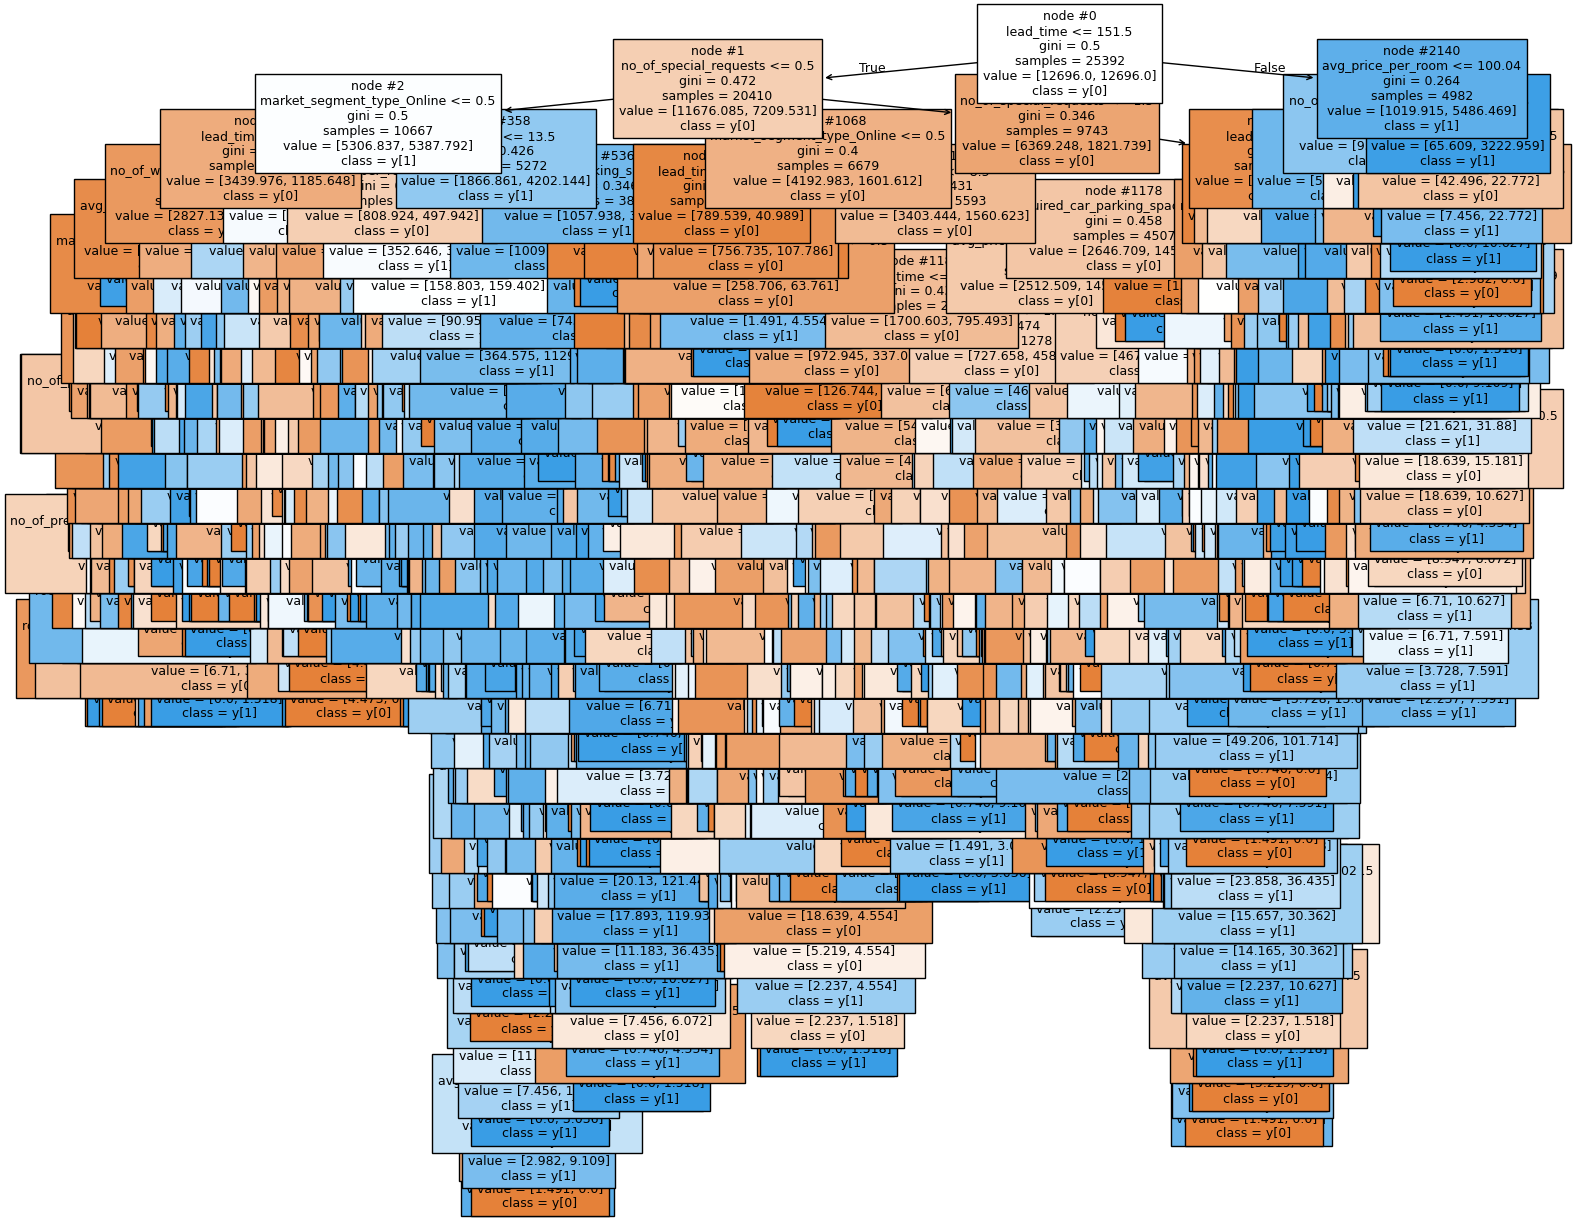

In [ ]:
# Visual of post pruned tree with highest F1 score
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of the post-pruned decision tree

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- no

In [ ]:
# Looking at importance of features in the post-pruned tree
print(pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                                         Imp
lead_time                            0.39444
avg_price_per_room                   0.15060
market_segment_type_Online           0.11340
no_of_special_requests               0.10306
arrival_month                        0.07385
no_of_week_nights                    0.04146
no_of_weekend_nights                 0.03285
no_of_adults                         0.02817
arrival_year                         0.01727
market_segment_type_Offline          0.01147
required_car_parking_space           0.00856
type_of_meal_plan_Not Selected       0.00621
room_type_reserved_Room_Type 4       0.00443
no_of_children                       0.00379
type_of_meal_plan_Meal Plan 2        0.00308
room_type_reserved_Room_Type 2       0.00308
room_type_reserved_Room_Type 5       0.00100
market_segment_type_Corporate        0.00085
repeated_guest                       0.00082
room_type_reserved_Room_Type 6       0.00071
no_of_previous_bookings_not_canceled 0.00060
room_type_

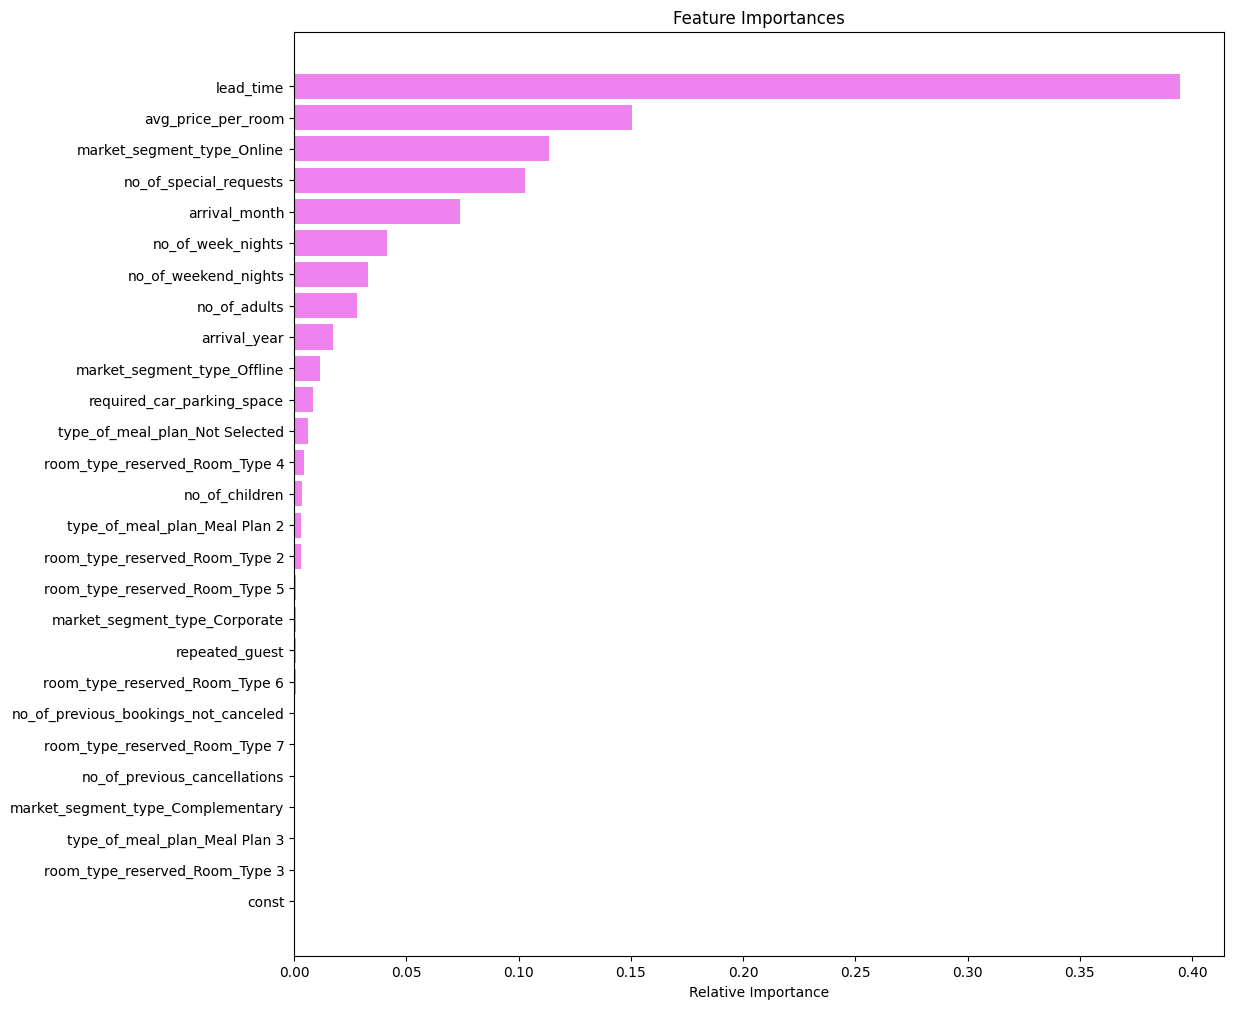

In [ ]:
# Printing a visual of importance of features in the post-pruned tree
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Lead time is still the most important feature.
* Followed by price per room, online market segment, and number of special requests.

## Model Performance comparison and Conclusions

In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99244                      0.84440   
Recall                   0.99486                      0.70369   
Precision                0.98241                      0.79981   
F1                       0.98859                      0.74868   

           Decision Tree (Post-Pruning)  
Accuracy                        0.94144  
Recall                          0.95516  
Precision                       0.87780  
F1                              0.91485

In [ ]:
# Test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86667                      0.84324   
Recall                   0.80664                      0.69705   
Precision                0.78676                      0.79347   
F1                       0.79658                      0.74214   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86667  
Recall                          0.85065  
Precision                       0.76409  
F1                              0.80505

**Observations:**
* Decision tree with post-pruning is giving the highest F1 score and recall on the test set.
* Pre pruned tree is the least complex and easy to interpret and has a higher F1 score than the logistic model.
* However, we will choose the post pruned tree as the best model since it is giving a higher F1 score and recall on the train and test sets compared to the pre-pruned tree.

## Actionable Insights and Recommendations

* The dataset consisted on 36275 rows on information about bookings for a hotel during 2 years.
* We built two different models to help predict if a guest will canceled or not.
* Both models (logistic regression with 0.37 threshold and post-pruned tree) can be used to predict booking cancellations.
* The post-pruned decision tree model gives the best F1 score overall. If the post-pruned is too complex to interpret, then the pre-pruned tree at a max depth of 6, still gives a better F1 score than the logistic regression model.
* The logistic regression model is a simpler model to interpret. However, the metrics are lower than with the decision tree.
* According to the logistic regression model, required parking space, repeated guest, number of special requests, room types 5 and 7, and maket segments offline and corporate are important features that decrease the chances of a guest canceling.
* Positive coefficients such as number of children, no selection of meal plan, and number of weekend nights have a high chance of increasing the odds of cancellation.
* According to the decision tree, lead time and average price per room are the most important features to predict cancellations. Online market segment and number of special requests also have high importance.
* Looking at the bivariate analysis, higher priced rooms, lower number of special requests, higher lead time, not repeating guests, and peak season months are more likely to cancel their reservations.

## What profitable policies for cancellations and refunds can the hotel adopt?

* Since more popular arrival months have higher cancellations, the hotel can keep average prices below 200€. Per the decision tree, most bookings under that price don't get canceled.
* Repeating guests are less likely to cancel a booking, the hotel should make arrangements for these guests.
* The hotel can modify the cancellation policies by market segment. For example, as online guests are more likely to cancel, the hotel could include a cancellation fee.
* Cancellation fees could increase as arrival date approaches to guarantee that the loses are lower. For example:
  * Full refund in the first 24 hours after booking.
  * 50% refund if booking is cancelled 15 days prior to arrival.
  * 25% refund if cancelled 7 days before arrival.
  * No refund if cancelled 48 hours prior to arrival.
* Include a loyalty program to increase repeating guests. Loyalty programs can include meal plans, parking space, discounts, or free nights with a minimum of determined nights.
* Online and offline customers are more likely to cancel. Average price per room is also higher for these two segments. The hotel should incentivize these guests or try to reduce the room prices.
* Complementary and corporate guests tend to be repeating guests. To offer incentives for these customers, the hotel could offer credits towards future stays if their booking is canceled.

## What other recommedations would you suggest to the hotel?

* The hotel can choose either of the models built to adapt their needs. We chose F1 score as our criterion for a balanced solution to booking cancellations. However, the needs of the hotel could benefit from a higher recall score, in which case  we would have to choose a different model.
* Replace Meal plan 3 (all meals included) for other incentives to be chosen by the guest. For example, one meal and a welcome gift bag, one or two meals and free laundry, a meal and champagne.
* Bookings that exceed a determined number of nights or an average price of 200€ receive a complementary gift bag. These guests could be offered instead a free dinner in the hotel or a restaurant in the area.
* Instead of a gift bag, the hotel can create connections with restaurants and businesses in the area to offer the guests discounts in local business. This could also be an additional request made during the booking process. For example, if a guest spends more than 200€ on average per night, the hotel lets the guest 2 gifts: discount meal in a local restaurant, free spa treatment at the hotel, discount at a local business, or a free bottle of wine.
* As number of special requests reduce the chances of cancellation, during the booking process (specially online) the hotel can offer additional personal requests such as meals or free room upgrade if available.